# **A Case Analysis of Airbnb 2021 Listings on Hawaii, Hawaii**

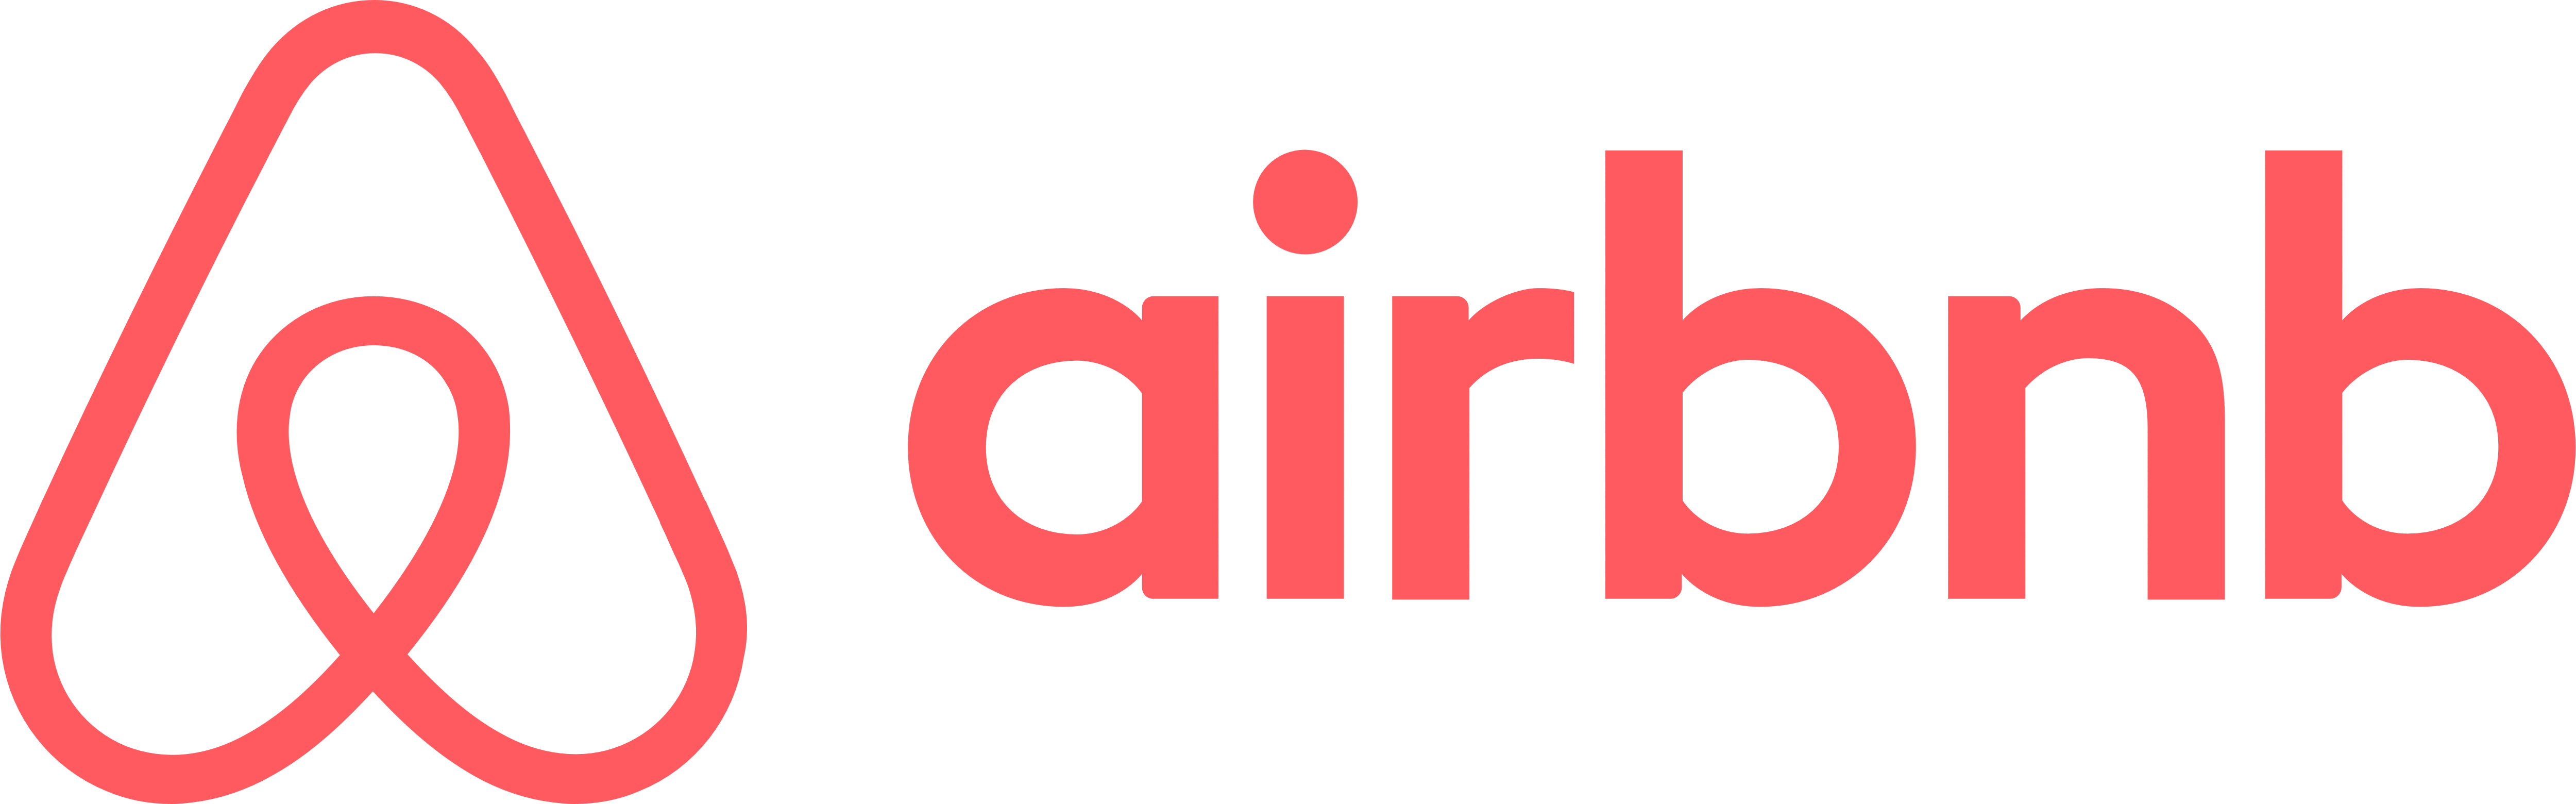

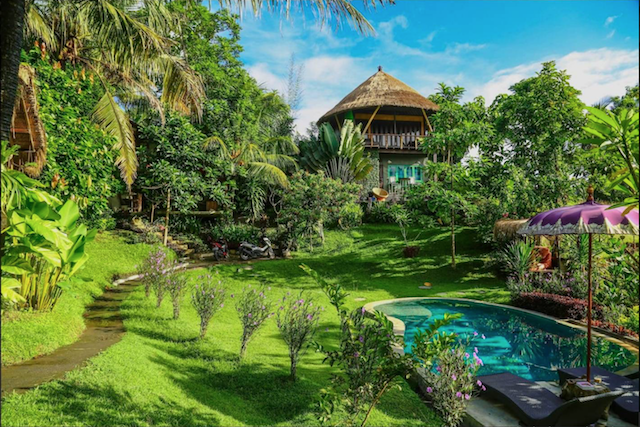

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. However, the scope in in this case analysis are only from December 2020 to December 2021. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Hawaii, Hawaii.

## **Loading Files**

Data Source: http://insideairbnb.com/get-the-data.html

In [ ]:
import requests
import os
import zipfile as zp
import gzip
import pandas as pd
import csv
import shutil
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
!git clone https://github.com/eliasezar27/PRESANA.git

Cloning into 'PRESANA'...
remote: Enumerating objects: 144, done.
remote: Total 144 (delta 0), reused 0 (delta 0), pack-reused 144
Receiving objects: 100% (144/144), 1.24 GiB | 9.72 MiB/s, done.
Resolving deltas: 100% (54/54), done.
Checking out files: 100% (53/53), done.


In [ ]:
base_dir = '/content/PRESANA/hawaii_airBnbGroup'

calendar_csv1 = os.path.join(base_dir, 'calendar_main_part1.csv')
calendar_csv2 = os.path.join(base_dir, 'calendar_main_part2.csv')
calendar_csv3 = os.path.join(base_dir, 'calendar_main_part3.csv')
calendar_csv4 = os.path.join(base_dir, 'calendar_main_part4.csv')

listings_csv = os.path.join(base_dir, 'listings_main.csv')

covid_csv = os.path.join(base_dir, 'hawaii_covid_cases.csv')

### **AirBnb Listings Descriptions**

In [ ]:
listings = pd.read_csv(listings_csv)
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31450 entries, 0 to 31449
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            31450 non-null  int64  
 1   listing_url                                   31450 non-null  object 
 2   scrape_id                                     31450 non-null  int64  
 3   last_scraped                                  31450 non-null  object 
 4   name                                          31450 non-null  object 
 5   description                                   31077 non-null  object 
 6   neighborhood_overview                         17223 non-null  object 
 7   picture_url                                   31450 non-null  object 
 8   host_id                                       31450 non-null  int64  
 9   host_url                                      31450 non-null 

### **AirBnb Listings History**

In [ ]:
calendar_df1 = pd.read_csv(calendar_csv1, parse_dates=['date'])
calendar_df2 = pd.read_csv(calendar_csv2, parse_dates=['date'])
calendar_df3 = pd.read_csv(calendar_csv3, parse_dates=['date'])
calendar_df4 = pd.read_csv(calendar_csv4, parse_dates=['date'])

calendar  = pd.concat([calendar_df1, calendar_df2, calendar_df3, calendar_df4])

print('Calendar dataframe Information:\n')
calendar.info()

Calendar dataframe Information:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9300867 entries, 0 to 2325215
Data columns (total 4 columns):
 #   Column          Dtype         
---  ------          -----         
 0   listing_id      int64         
 1   date            datetime64[ns]
 2   available       object        
 3   adjusted_price  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 354.8+ MB


### **Hawaii Covid Cases**

In [ ]:
covid_cases = pd.read_csv(covid_csv, parse_dates=['date'])
covid_cases['cumsum'] = covid_cases['total'].cumsum()
covid_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      641 non-null    datetime64[ns]
 1   hawaii    641 non-null    int64         
 2   honolulu  641 non-null    int64         
 3   maui      641 non-null    int64         
 4   kauai     641 non-null    int64         
 5   total     641 non-null    int64         
 6   cumsum    641 non-null    int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 35.2 KB


## **Data Cleanup and Preprocessing**

### **AirBnb Listings Descriptions**

In [ ]:
print('Look for null values in the dataframe per column\n')

col_nans = listings.isnull().sum()[listings.isnull().sum() > 0].index.values # Saving all columns names with nan values into a variable
listings.isnull().sum()[listings.isnull().sum() > 0]

Look for null values in the dataframe per column



description                      373
neighborhood_overview          14227
host_name                        199
host_since                       199
host_location                    235
host_about                      9329
host_response_time              4644
host_response_rate              4644
host_acceptance_rate            3974
host_is_superhost                199
host_thumbnail_url               199
host_picture_url                 199
host_neighbourhood              5190
host_listings_count              199
host_total_listings_count        199
host_has_profile_pic             199
host_identity_verified           199
neighbourhood                  14227
bathrooms                      31450
bathrooms_text                    40
bedrooms                        4404
beds                             104
minimum_minimum_nights             1
maximum_minimum_nights             1
minimum_maximum_nights             1
maximum_maximum_nights             1
minimum_nights_avg_ntm             1
m

In [ ]:
# Listing price that are $0.00 and their host name

listings[listings['price'] == 0][['id', 'host_name', 'price']]

id                           host_name  price
20014  41740619                    Alohilani Resort    0.0
21146  43309266                       Hilo Hawaiian    0.0
25167  47816777  Waipouli Beach Resort By Outrigger    0.0

In [ ]:
# View other listings with same host name with listings priced at $0.00

print('Total istings with host name: Alohilani Resort ', listings[listings['host_name'] == 'Alohilani Resort']['host_name'].count())
print('Total istings with host name: Hilo Hawaiian ', listings[listings['host_name'] == 'Hilo Hawaiian']['host_name'].count())
print('Total istings with host name: Waipouli Beach Resort By Outrigger ', listings[listings['host_name'] == 'Waipouli Beach Resort By Outrigger']['host_name'].count())

Total istings with host name: Alohilani Resort  11
Total istings with host name: Hilo Hawaiian  15
Total istings with host name: Waipouli Beach Resort By Outrigger  1


In [ ]:
# Fill $0.00 priced listing with the median price from the listings that belongs to the same host name

mask1 = listings['id'] == 41740619
mask2 = listings['id'] == 43309266

listings['price'] = listings['price'].mask(mask1, float(listings[listings['host_name'] == 'Alohilani Resort']['price'].median()))
listings['price'] = listings['price'].mask(mask2, float(listings[listings['host_name'] == 'Hilo Hawaiian']['price'].median()))

# Drop listing with $0.00 price and no similar host name

listings = listings.drop([listings.index[listings['id'] == 47816777][0]])

In [ ]:
# Dropping columns containing any nan values

listings.drop(columns=col_nans, inplace=True)
listings.dropna(1, inplace=True)

In [ ]:
listings.query('neighbourhood_group_cleansed == "Hawaii"', inplace = True)

In [ ]:
listings.describe().transpose()

count  ...           max
id                                            6916.0  ...  5.270264e+07
scrape_id                                     6916.0  ...  2.021101e+13
host_id                                       6916.0  ...  4.256465e+08
latitude                                      6916.0  ...  2.025842e+01
longitude                                     6916.0  ... -1.548229e+02
accommodates                                  6916.0  ...  1.600000e+01
price                                         6916.0  ...  2.499900e+04
minimum_nights                                6916.0  ...  2.000000e+02
maximum_nights                                6916.0  ...  1.825000e+03
availability_30                               6916.0  ...  3.000000e+01
availability_60                               6916.0  ...  6.000000e+01
availability_90                               6916.0  ...  9.000000e+01
availability_365                              6916.0  ...  3.650000e+02
number_of_reviews                             6916.0  ...  8.470000e+02
number_of_reviews_ltm                         6916.0  ...  1.460000e+02
number_of_reviews_l30d                        6916.0  ...  1.500000e+01
calculated_host_listings_count                6916.0  ...  4.760000e+02
calculated_host_listings_count_entire_homes   6916.0  ...  4.760000e+02
calculated_host_listings_count_private_rooms  6916.0  ...  1.440000e+02
calculated_host_listings_count_shared_rooms   6916.0  ...  6.000000e+00

[20 rows x 8 columns]

In [ ]:
listings.reset_index(drop=True, inplace=True)

### **AirBnb Listings History**

In [ ]:
print('Look for null values in the dataframe per column\n')

calendar.isnull().sum()

Look for null values in the dataframe per column



listing_id          0
date                0
available           0
adjusted_price    287
dtype: int64

In [ ]:
# Fill null in adjusted price column with the price based on the listing price in the listings dataframe.

for i in calendar[calendar['adjusted_price'].isnull()]['listing_id'].unique():
    mask = calendar['listing_id'] == i
    try:
        rep_val = listings[listings['id'] == i]['price'].values[0]
        calendar['adjusted_price'] = calendar['adjusted_price'].mask(mask, calendar['adjusted_price'].fillna(rep_val))
    except:
        pass

In [ ]:
# Transform categorical available column into numeric where 'f' is 1 and 't' is 0
calendar['occupied'] = calendar['available'].map({'f': 1, 't': 0})

In [ ]:
calendar.rename(columns={'listing_id':'id'}, inplace=True)
calendar = pd.merge(calendar, 
                    listings[['id', 'name', 'neighbourhood_group_cleansed', 'longitude', 'latitude', 'room_type']], 
                    on='id', how='left')
calendar.rename(columns={'neighbourhood_group_cleansed':'county'}, inplace=True)
calendar.rename(columns={'adjusted_price':'price'}, inplace=True)

In [ ]:
# Sort calendar dataframe based on date from oldest to latest
calendar = calendar.sort_values(['date', 'id'])

# View the oldest and latest listing history
print("Historical Listings are from:", pd.to_datetime(calendar.date).min(), 'to', pd.to_datetime(calendar.date).max())

Historical Listings are from: 2020-12-19 00:00:00 to 2021-12-03 00:00:00


In [ ]:
calendar.describe().transpose()

count          mean  ...           75%           max
id         9300867.0  3.011329e+07  ...  4.335773e+07  5.272250e+07
price      9300600.0  3.917614e+02  ...  3.570000e+02  2.500000e+04
occupied   9300867.0  6.744477e-01  ...  1.000000e+00  1.000000e+00
longitude  2076257.0 -1.556932e+02  ... -1.552571e+02 -1.548229e+02
latitude   2076257.0  1.967182e+01  ...  1.990241e+01  2.025842e+01

[5 rows x 8 columns]

In [ ]:
calendar.query('county == "Hawaii"', inplace = True)
calendar.reset_index(drop=True, inplace=True)

In [ ]:
# Compute AirBnb's Profit per occupied listings
calendar_profit = calendar.query('occupied == 1').assign(profit = lambda x: (x['price'] * 0.03) + (x['price'] * 0.14)).reset_index(drop=True)

In [ ]:
# Dataframe for aggregated occupied listing tally and median price per date
calendar_day = calendar.groupby('date', as_index=False)['occupied'].sum()
calendar_day = pd.merge(calendar_day,
                        calendar_profit.groupby('date', as_index=False)['price'].mean(),
                        on='date', how='left')
calendar_day = pd.merge(calendar_day,
                        calendar_profit.groupby('date', as_index=False)['profit'].sum(),
                        on='date', how='left')

# Dataframe with aggregated occupied listing tally per id listing
calendar_id = calendar.query('occupied == 1').groupby(['id'], as_index=False)['occupied'].sum()
calendar_id = pd.merge(calendar_id, 
                       listings[['id', 'name', 'longitude', 'latitude', 'price', 'room_type']], 
                       on='id', how='left').drop_duplicates('id').reset_index(drop=True)
calendar_id = calendar_id.assign(profit = lambda x: ((x['price'] * 0.03) + (x['price'] * 0.14)) * x['occupied'] ).reset_index(drop=True)

In [ ]:
apartment_rm = calendar_profit.query('room_type == "Entire home/apt"').groupby('date', as_index=False)['profit'].mean()
apartment_rm.index = pd.to_datetime(apartment_rm['date'])
apartment_rm.drop(columns=['date'], inplace = True)
apartment_rm = apartment_rm.asfreq('d')

private_rm = calendar_profit.query('room_type == "Private room"').groupby('date', as_index=False)['profit'].mean()
private_rm.index = pd.to_datetime(private_rm['date'])
private_rm.drop(columns=['date'], inplace = True)
private_rm = private_rm.asfreq('d')

shared_rm = calendar_profit.query('room_type == "Shared room"').groupby('date', as_index=False)['profit'].mean()
shared_rm.index = pd.to_datetime(shared_rm['date'])
shared_rm.drop(columns=['date'], inplace = True)
shared_rm = shared_rm.asfreq('d')

hotel_rm = calendar_profit.query('room_type == "Hotel room"').groupby('date', as_index=False)['profit'].mean()
hotel_rm.index = pd.to_datetime(hotel_rm['date'])
hotel_rm.drop(columns=['date'], inplace = True)
hotel_rm = hotel_rm.asfreq('d')

## **Descriptive Analytics**

### During Dec 19, 2020 to Dec 3, 2021

What are the locations of the listed properties in AirBNB around the Hawaii state?

In [ ]:
fig = px.scatter_mapbox(calendar_id, lat="latitude", lon="longitude",
                        hover_name="name", hover_data=["price", "occupied", "profit"],
                        color="room_type", zoom=7.9, height=600)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.update_layout(legend=dict(
                                yanchor="top",
                                y=0.99,
                                xanchor="left",
                                x=0.01
                            ))
fig.show()

What Room Type has the most AirBNB listings?

In [ ]:
fig = px.bar(calendar_id.groupby(['room_type'], as_index=False).count().sort_values(['id'], ascending=False), 
             x="room_type", y="id", labels={'room_type': 'Room Type', 'id':'Count'},
             title='Number of Listings per Room Type', color = 'room_type')
fig.show()

How frequent was a specific listing was occupied per room type?

What is the average listing occupancy per room type?

In [ ]:
fig = px.bar(calendar_id.groupby(['room_type'], as_index=False).mean().sort_values(['occupied'], ascending=False), 
             x="room_type", y="occupied", labels={'room_type': 'Room Type', 'occupied':'Count'}, hover_data = ['profit'],
             title='Average Listing Occupancy per Room Type', color = 'room_type')
fig.show()

What listings are affordable?

In [ ]:
fig = px.bar(calendar_id[['name', 'price', 'room_type']].sort_values(['price'], ascending = False).tail(10), 
             x="price", y="name", orientation='h', hover_name='room_type', color = 'room_type',
             title='Top 10 Afordable Listing')
fig.show()

What is the distribution of the listing prices?

In [ ]:
fig = px.histogram(calendar_id, x="price",
                   labels={'profit': 'Price ($)'},
                   title='Distribution of Listing Price in Hawaii State')
fig.show()

What are the profit ranges for every room types in the listing?

In [ ]:
fig = px.box(calendar_id, x="room_type", y="price",
             labels={'price': 'Price ($)', 'room_type': 'Room Type'},
             title='Listing Prices per Room type', color='room_type')
fig.update_layout(legend=dict(
                                yanchor="top",
                                y=0.99,
                                xanchor="right",
                                x=.99
                            ))
fig.show()

What is the behavior of the listing profits per day?

In [ ]:
fig = px.line(calendar_day, x="date", y="profit", 
              title='Sum Profits per Day',
              labels={'profit': 'Sum Profits ($)'})
fig.show()

What is the renting behavior of all the listings per day?

In [ ]:
fig = px.line(calendar_day, x="date", y="occupied", 
              title='Daily Occupied Listings',
              labels={'occupied': 'Total Listings Occupied'})
fig.update_layout(legend=dict(
                                yanchor="top",
                                y=0.99,
                                xanchor="left",
                                x=.01
                            ))
fig.show()

What is the behavior of the Listings during COVID-19 pandemic?

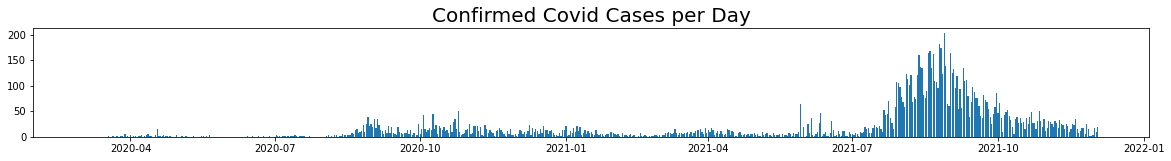

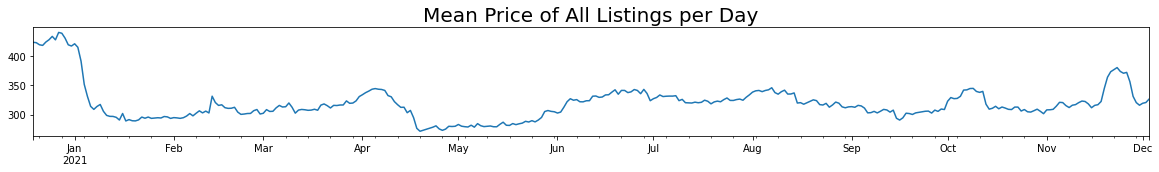

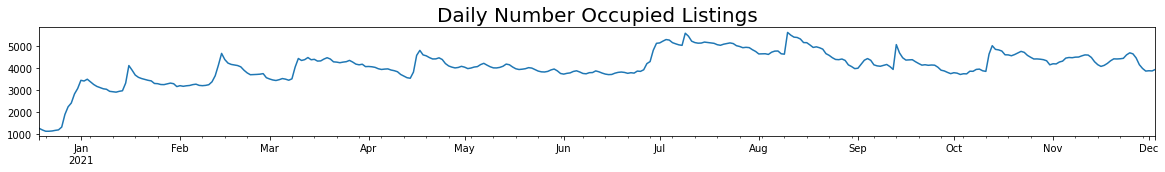

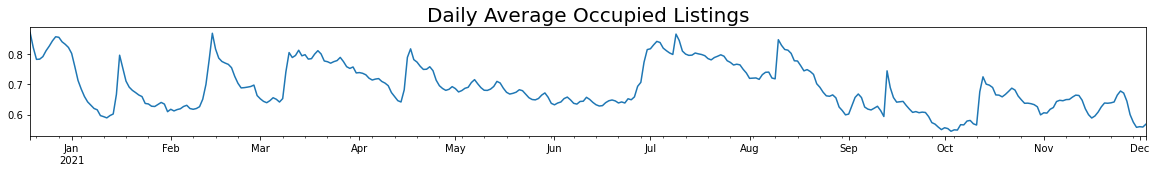

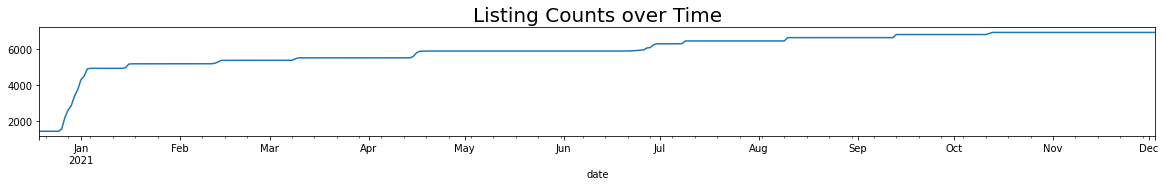

In [ ]:
plt.figure(figsize=(20,2))
plt.title('Confirmed Covid Cases per Day', fontdict={'fontsize': 20})
plt.bar(covid_cases['date'], covid_cases['hawaii'])
plt.show()

plt.figure(figsize=(20,2))
plt.title('Mean Price of All Listings per Day', fontdict={'fontsize': 20})
calendar_day.groupby('date')['price'].mean().plot()
plt.xlabel(None)
plt.show()

plt.figure(figsize=(20,2))
plt.title('Daily Number Occupied Listings', fontdict={'fontsize': 20})
calendar.groupby('date')['occupied'].sum().plot()
plt.xlabel(None)
plt.show()

plt.figure(figsize=(20,2))
plt.title('Daily Average Occupied Listings', fontdict={'fontsize': 20})
calendar.groupby('date')['occupied'].mean().plot()
plt.xlabel(None)
plt.show()

plt.figure(figsize=(20,2))
plt.title('Listing Counts over Time', fontdict={'fontsize': 20})
calendar.groupby('date')['occupied'].count().plot()
plt.show()

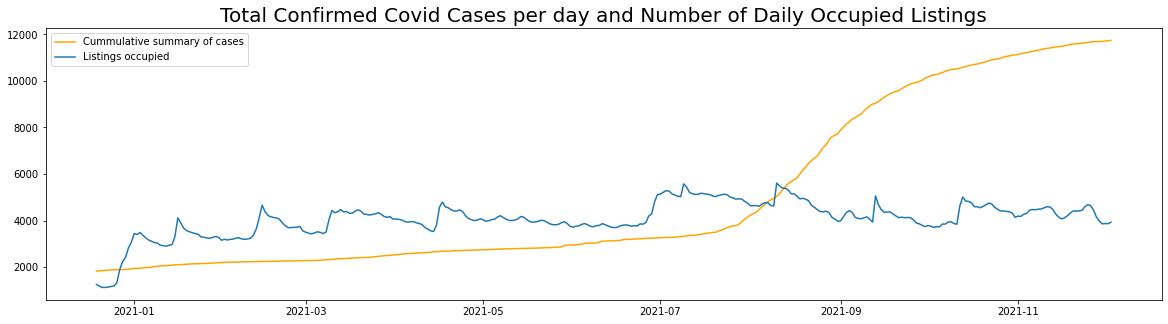

In [ ]:
covid_cases['cumsum'] = covid_cases['hawaii'].cumsum()
covid_cases2 = covid_cases[covid_cases['date'] >= calendar['date'].min()][['date', 'hawaii', 'cumsum']]

plt.figure(figsize=(20,5))
plt.title('Total Confirmed Covid Cases per day and Number of Daily Occupied Listings', fontdict={'fontsize': 20})
plt.plot(covid_cases2['date'], covid_cases2['cumsum'], label='Cummulative summary of cases', color='orange')
plt.plot(calendar_day.groupby('date')['occupied'].sum(), label='Listings occupied')
plt.legend()
plt.show()

What is the Correlation of Daily Number of Occupied Listings and the Median Price of the Listings per Day?

In [ ]:
fig = px.scatter(calendar_day, 
                 x="occupied", y="price", 
                 title='Daily Number of Occupied Listings vs Mean Price of Listings per Day',
                 labels={'price': 'Mean Prices ($)', 'occupied': 'Total Listings Occupied'})
fig.show()

In [ ]:
calendar_day[['occupied', 'price']].corr("pearson")

occupied     price
occupied  1.000000 -0.329046
price    -0.329046  1.000000

Exactly –1. A perfect downhill (negative) linear relationship

–0.70. A strong downhill (negative) linear relationship

–0.50. A moderate downhill (negative) relationship

–0.30. A weak downhill (negative) linear relationship

0. No linear relationship

+0.30. A weak uphill (positive) linear relationship

+0.50. A moderate uphill (positive) relationship

+0.70. A strong uphill (positive) linear relationship

Exactly +1. A perfect uphill (positive) linear relationship

## **Predictive Analytics**

### Regression Model for Daily Number of Occupied listing vs Median Price Listings per Day

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
y = calendar_day[['price']]
x = calendar_day[['occupied']]

lr_model = lr.fit(x, y)

r_sq = lr_model.score(x, y)
print('coefficient of determination (R-squared):', r_sq)
print('Meaning - Only 10.11% of the model fits the observed data')

coefficient of determination (R-squared): 0.10827139815942388
Meaning - Only 10.11% of the model fits the observed data


In [ ]:
fig = px.scatter(calendar_day, 
                 x="occupied", y="price", 
                 title='Daily Number of Occupied Listings vs Mean Price of Listings per Day', 
                 trendline='ols', trendline_color_override='red',
                 labels={'price': 'Mean Prices ($)', 'occupied': 'Total Listings Occupied'})
fig.show()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



It implies that the higher the number of occupied listings, the lower the mean of the listing price will be.

### ARIMA for Mean Profit from Listings per Day

In [ ]:
calendar_day.index = calendar_day['date']
calendar_day = calendar_day.asfreq('d')

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adfTest(data):
    print('H0: Data is non-stationary')
    print('Ha: Data is stationary \n')
    dec = {1: 'fail to reject', 2: 'reject', 3: 'Non-stationary', 4: 'Stationary'}
    X = data
    result = adfuller(X)#, maxlag=13, autolag='BIC')
    print('ADF Statistic/ Test Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('No. of lags: %d' % result[2])
    print('Num of obs: %d' % result[3])
    print('Critical Values:')
    for key, value in result[4].items():
        con = dec[2] if result[0] < value else dec[1]
        print('\t%s: %.3f, therefore,' % (key, value), con, 'null hypothesis')
    
    print('\nFor a 5% critical value, the data is', dec[3] if con == dec[1] else dec[4])  

H0: Data is non-stationary

Ha: Data is stationary 

if Test Statistic < Critical Values => Rejects the null hypothesis.

if Test Statistic > Critical Values => failed to reject the null hypothesis.

In [ ]:
adfTest(calendar_day['profit'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -3.947102
p-value: 0.001714
No. of lags: 2
Num of obs: 347
Critical Values:
	1%: -3.449, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
def globVSloc(data):
    from math import sqrt
    # Cochran's Sample Size
    n0 = int(((1.96)**2 * (0.5) * (1 - 0.5)) / (0.05)**2)
    n = int(n0 /(1+(( n0 - 1 )/ len(data) )))

    dec_mean = {1: 'Reject H0', 2: 'Fail to reject H0'}


    global_mean = abs(data.mean())
    global_sd = sqrt(data.var())
    local_mean = abs(data[:n].mean())

    z_range = [-1.63, 1.63]

    z_val = (local_mean - global_mean)/(global_sd/sqrt(n))

    hyp = dec_mean[1] if z_val < z_range[0] or z_val > z_range[1] else dec_mean[2]

    dec_mean = 'Stationary' if hyp is not 'Reject H0' else 'Not Stationary'

    print('Global Mean: {:,.2f}'.format(global_mean))
    print('Global Standard Deviation: {:,.2f}'.format(global_sd))
    print('Number of Samples: {:,.2f}'.format(n))
    print('Local Mean: {:,.2f}'.format(local_mean))

    print('\nHypothesis Testing using z\n')
    print('H0: Global Mean == Local Mean')
    print('Ha: Global Mean != Local Mean')
    print('Two-tailed Test')
    print('Confidence Level: 0.95')
    print('z range: -1.63 --- 1.63')
    print('z score is: ', z_val)
    print('Therefore,', hyp)
    print('Data is:', dec_mean)

In [ ]:
globVSloc(calendar_day['profit'])

Global Mean: 219,532.21
Global Standard Deviation: 41,957.29
Number of Samples: 183.00
Local Mean: 193,711.30

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -8.325102678204145
Therefore, Reject H0
Data is: Not Stationary


In [ ]:
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.api import qqplot

def corr(df):
    r,q,p = sm.tsa.acf(df, fft=True, qstat=True, nlags=36)
    r2 = sm.tsa.pacf(df, nlags=36)
    data = np.c_[range(1,37), r[1:], r2[1:], q, p]
    table = pd.DataFrame(data, columns=['lag', "AC", "PAC", "Q", "Prob"])
    print(table.set_index('lag'))

    fig = plt.figure(figsize=(24,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(df, lags=36, ax=ax1, zero=False)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(df, lags=36, ax=ax2, zero=False)

    plt.show()

            AC       PAC            Q           Prob
lag                                                 
1.0   0.954323  0.957057   321.496232   6.838987e-72
2.0   0.890086 -0.246988   601.972009  1.920610e-131
3.0   0.828443  0.045854   845.644376  5.453854e-183
4.0   0.766913 -0.059946  1055.068290  4.148632e-227
5.0   0.707388 -0.002888  1233.761083  1.428584e-264
6.0   0.653686  0.024140  1386.796178  1.750750e-296
7.0   0.602000 -0.036396  1516.965701   0.000000e+00
8.0   0.552416 -0.005314  1626.895880   0.000000e+00
9.0   0.518217  0.154331  1723.919886   0.000000e+00
10.0  0.498100  0.076276  1813.820843   0.000000e+00
11.0  0.485613  0.044538  1899.522956   0.000000e+00
12.0  0.483883  0.109684  1984.867275   0.000000e+00
13.0  0.493037  0.097302  2073.734118   0.000000e+00
14.0  0.506175  0.044161  2167.679079   0.000000e+00
15.0  0.510891 -0.097002  2263.668433   0.000000e+00
16.0  0.511112  0.002056  2360.028430   0.000000e+00
17.0  0.506387 -0.024473  2454.898900   0.0000

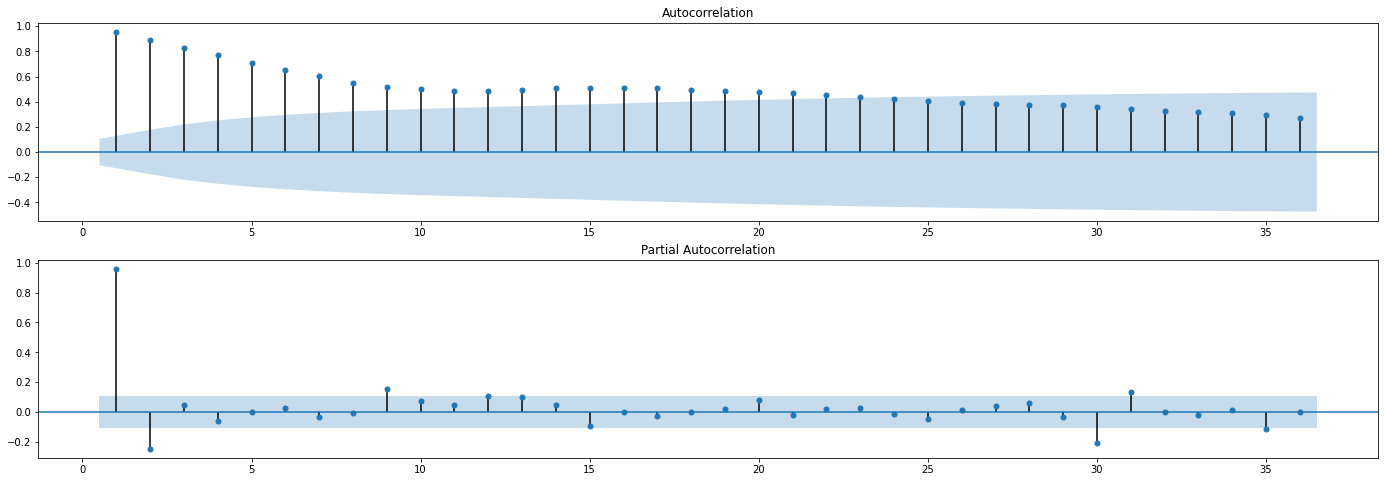

In [ ]:
corr(calendar_day['profit'])

In [ ]:
def firstlvldiff(df):
    first_level = [0]
    for i in range(len(df['profit'])):
        if i > 0:
            first_level.append(df['profit'][i] - df['profit'][i-1])

    df['frst_lvl_dff'] = first_level

    df[['frst_lvl_dff']].plot(figsize=(15, 7))
    plt.show()

    return df

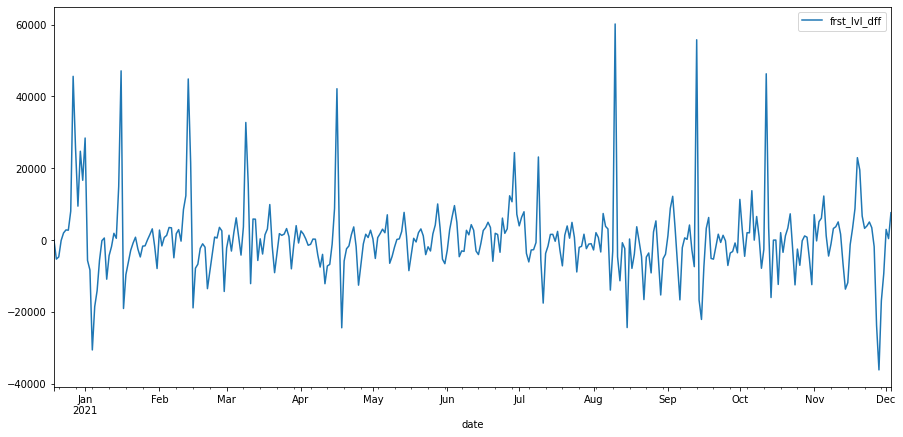

In [ ]:
calendar_day = firstlvldiff(calendar_day)

In [ ]:
adfTest(calendar_day['frst_lvl_dff'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -12.920772
p-value: 0.000000
No. of lags: 1
Num of obs: 348
Critical Values:
	1%: -3.449, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(calendar_day['frst_lvl_dff'])

Global Mean: 365.61
Global Standard Deviation: 10,621.89
Number of Samples: 183.00
Local Mean: 719.86

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  0.45115669689235266
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC           Q          Prob
lag                                               
1.0   0.270793  0.271569   25.885654  3.622514e-07
2.0  -0.057124 -0.141648   27.040877  1.343223e-06
3.0  -0.003484  0.058133   27.045186  5.760327e-06
4.0  -0.025819 -0.055229   27.282551  1.742803e-05
5.0  -0.082518 -0.062717   29.714110  1.678787e-05
6.0  -0.023003  0.015794   29.903614  4.100208e-05
7.0  -0.007569 -0.022870   29.924192  9.804856e-05
8.0  -0.092240 -0.093588   32.989120  6.186689e-05
9.0  -0.137316 -0.100737   39.801541  8.254071e-06
10.0 -0.089408 -0.052322   42.698110  5.630635e-06
11.0 -0.087829 -0.082949   45.501516  3.959441e-06
12.0 -0.116094 -0.100826   50.414150  1.181445e-06
13.0  0.030299  0.065288   50.749751  2.215971e-06
14.0  0.112051  0.049906   55.353410  7.527779e-07
15.0  0.042091 -0.008682   56.004968  1.209416e-06
16.0 -0.023549 -0.047447   56.209524  2.247073e-06
17.0  0.017465  0.006157   56.322373  4.194558e-06
18.0 -0.026175 -0.067307   56.5

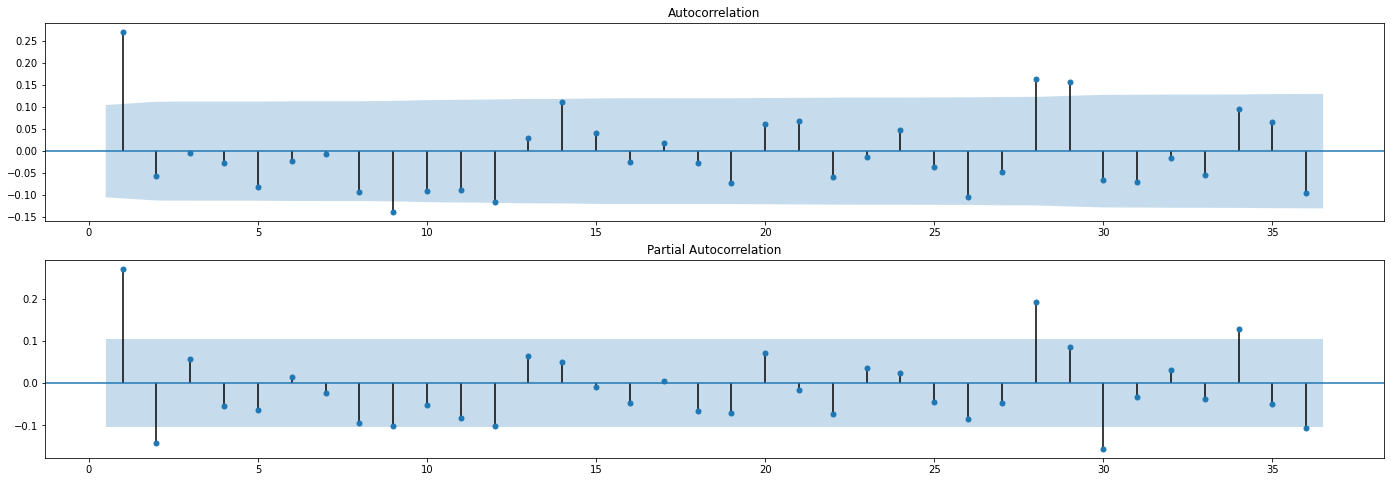

In [ ]:
corr(calendar_day['frst_lvl_dff'])

In [ ]:
import warnings
import itertools
warnings.filterwarnings("ignore")

In [ ]:
p = [1,2] # AR = PCF
d = [1] # diffrence
q = [1] # MA = ACF
pdq = list(itertools.product(p, d, q))
print("PDQ are", pdq)

PDQ are [(1, 1, 1), (2, 1, 1)]


In [ ]:
aic_list = []
bic_list = []
hqic_list = []
pdq_models = []
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        mod = ARIMA(calendar_day['frst_lvl_dff'], order=param)
        results = mod.fit()
        # AIC - Aikake, BIC - schwarz criterion, HQIC - Hannan-Quinn
        print('ARIMA{}\tAIC:{:,}\t BIC:{:,}\t HQIC:{:,}'.format(param, round(results.aic, 2), round(results.bic, 2), round(results.hqic, 2)))
        pdq_models.append(param)
        aic_list.append(results.aic)
        bic_list.append(results.bic)
        hqic_list.append(results.hqic)
    except:
        continue

ARIMA(1, 1, 1)	AIC:7,447.33	 BIC:7,462.75	 HQIC:7,453.47
ARIMA(2, 1, 1)	AIC:7,442.35	 BIC:7,461.63	 HQIC:7,450.03


In [ ]:
print('ARIMA model with lowest AIC', pdq_models[aic_list.index(min(aic_list))])
print('ARIMA model with lowest BIC', pdq_models[bic_list.index(min(bic_list))])
print('ARIMA model with lowest HQIC', pdq_models[hqic_list.index(min(hqic_list))])

ARIMA model with lowest AIC (2, 1, 1)
ARIMA model with lowest BIC (2, 1, 1)
ARIMA model with lowest HQIC (2, 1, 1)


In [ ]:
mod211 = ARIMA(calendar_day['profit'], order=(2, 1, 1))
arima211 = mod211.fit()

In [ ]:
# Make Predictions until 2022 February
arima211_pred = arima211.predict("2020-12-27", "2022-02-1", typ='levels')

# Get Confidence Intervals of the new unobserved dates
arima211_conf_int = pd.DataFrame(arima211.forecast(59)[2], columns=['min', 'max'])
ind_slice = len(arima211_pred) - len(arima211_conf_int)
arima211_conf_int.index = arima211_pred.index[ind_slice:]

In [ ]:
# Check Residuals
def check_resid(arima_model):
    resids = arima_model.resid
    r,q,p = sm.tsa.acf(resids, fft=True, qstat=True, nlags=36)
    r2 = sm.tsa.pacf(resids, nlags=36)
    data = np.c_[range(1,37), r[1:], r2[1:], q, p]
    table = pd.DataFrame(data, columns=['lag', "AC", "PAC", "Q", "Prob"])
    print(table.set_index('lag'))

    fig = plt.figure(figsize=(24,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(resids, lags=36, ax=ax1, zero=False)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(resids, lags=36, ax=ax2, zero=False)

            AC       PAC          Q      Prob
lag                                          
1.0   0.001165  0.001168   0.000478  0.982566
2.0  -0.000573 -0.000577   0.000593  0.999703
3.0   0.004202  0.004240   0.006846  0.999850
4.0  -0.009898 -0.010024   0.041635  0.999786
5.0  -0.078603 -0.079727   2.241804  0.814775
6.0  -0.009673 -0.009805   2.275220  0.892727
7.0   0.000720  0.000759   2.275406  0.943040
8.0  -0.067928 -0.069409   3.932979  0.863119
9.0  -0.106427 -0.112070   8.013904  0.532746
10.0 -0.058688 -0.069650   9.258491  0.507760
11.0 -0.045449 -0.051567  10.007102  0.529748
12.0 -0.112195 -0.124046  14.582744  0.265051
13.0  0.036775  0.018108  15.075803  0.302644
14.0  0.085897  0.067945  17.773835  0.217276
15.0  0.032897  0.021906  18.170754  0.253795
16.0 -0.035571 -0.056172  18.636214  0.287978
17.0  0.027549 -0.006582  18.916246  0.333361
18.0 -0.008882 -0.027001  18.945442  0.395190
19.0 -0.083408 -0.103345  21.527903  0.308377
20.0  0.062608  0.036609  22.98736

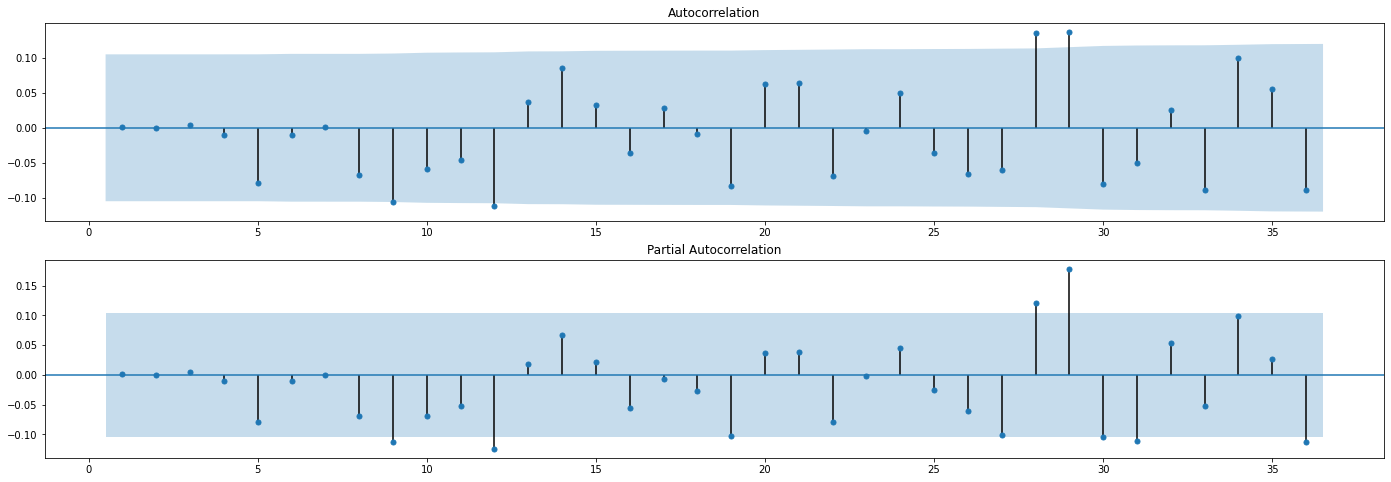

In [ ]:
check_resid(arima211)

In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(calendar_day['profit'][8:350], arima211_pred[:342]))
print('Test RMSE: {:,.3f}'.format(rmse))

Test RMSE: 10,189.707


What will be the trend of the AirBNB profit in Hawaii, Hawaii?

In [ ]:
def show_plot(df, pred, conf, tit = "Profits"):
    fig, ax = plt.subplots(figsize=(30,10))
    plt.title(tit + ': Original Observation vs ARIMA Prediction', {'fontsize': 50})
    plt.plot(df['profit'], label='Original Obs', color='green', linewidth=3)
    plt.plot(pred, label='Prediction until 1st of February 2022', color='red', linestyle='dashed')
    plt.plot(conf['min'], label='Prediction\'s Confidence Interval', color='blue')
    plt.plot(conf['max'], color='blue')
    plt.legend(prop={'size': 20})
    plt.show()

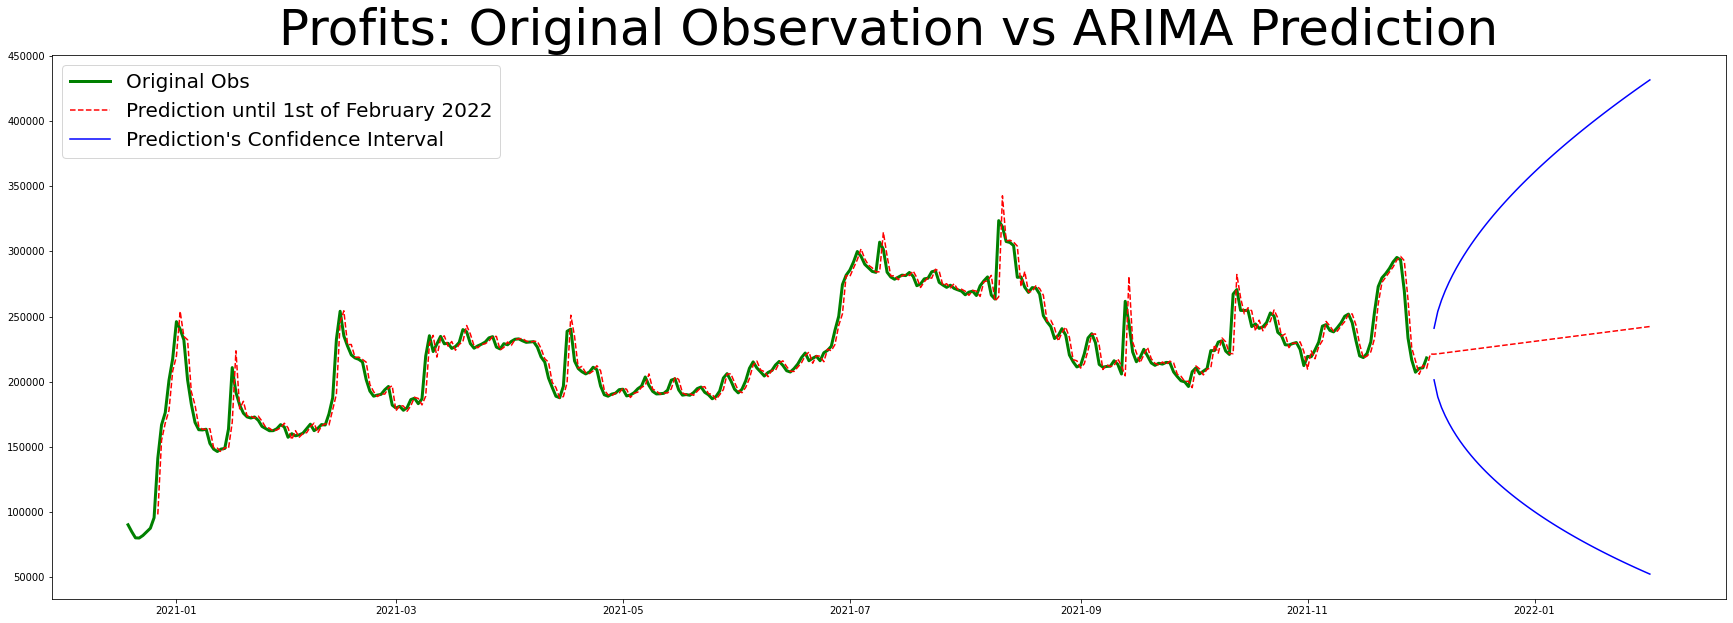

In [ ]:
show_plot(calendar_day, arima211_pred, arima211_conf_int)

### ARIMA for Mean Profit from Apartment/Entire Home Listings per Day

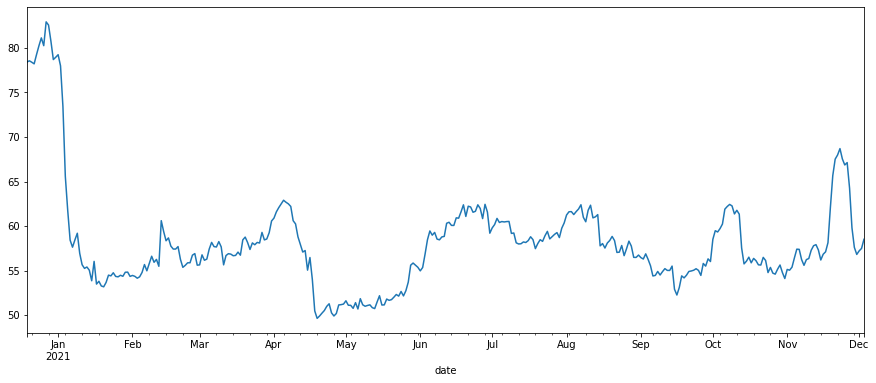

In [ ]:
plt.figure(figsize=(15,6))
apartment_rm['profit'].plot()
plt.show()

In [ ]:
adfTest(apartment_rm['profit'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -5.878863
p-value: 0.000000
No. of lags: 9
Num of obs: 340
Critical Values:
	1%: -3.450, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(apartment_rm['profit'])

Global Mean: 58.17
Global Standard Deviation: 5.78
Number of Samples: 183.00
Local Mean: 57.97

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -0.48159174235836505
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC            Q           Prob
lag                                                 
1.0   0.963035  0.965795   327.393113   3.552855e-73
2.0   0.914163 -0.198421   623.248162  4.606607e-136
3.0   0.860881 -0.065044   886.376621  7.979960e-192
4.0   0.804010 -0.069624  1116.551059  1.957239e-240
5.0   0.742340 -0.092425  1313.338453  8.232919e-282
6.0   0.680250 -0.020271  1479.064039   0.000000e+00
7.0   0.614628 -0.091719  1614.752122   0.000000e+00
8.0   0.544400 -0.098690  1721.515115   0.000000e+00
9.0   0.471821 -0.063079  1801.943836   0.000000e+00
10.0  0.404046  0.037354  1861.099068   0.000000e+00
11.0  0.340424  0.001994  1903.215464   0.000000e+00
12.0  0.281841  0.016283  1932.169016   0.000000e+00
13.0  0.226986 -0.014143  1951.004527   0.000000e+00
14.0  0.170692 -0.099817  1961.687645   0.000000e+00
15.0  0.113554 -0.062014  1966.429772   0.000000e+00
16.0  0.064379  0.072025  1967.958574   0.000000e+00
17.0  0.031034  0.169852  1968.314889   0.0000

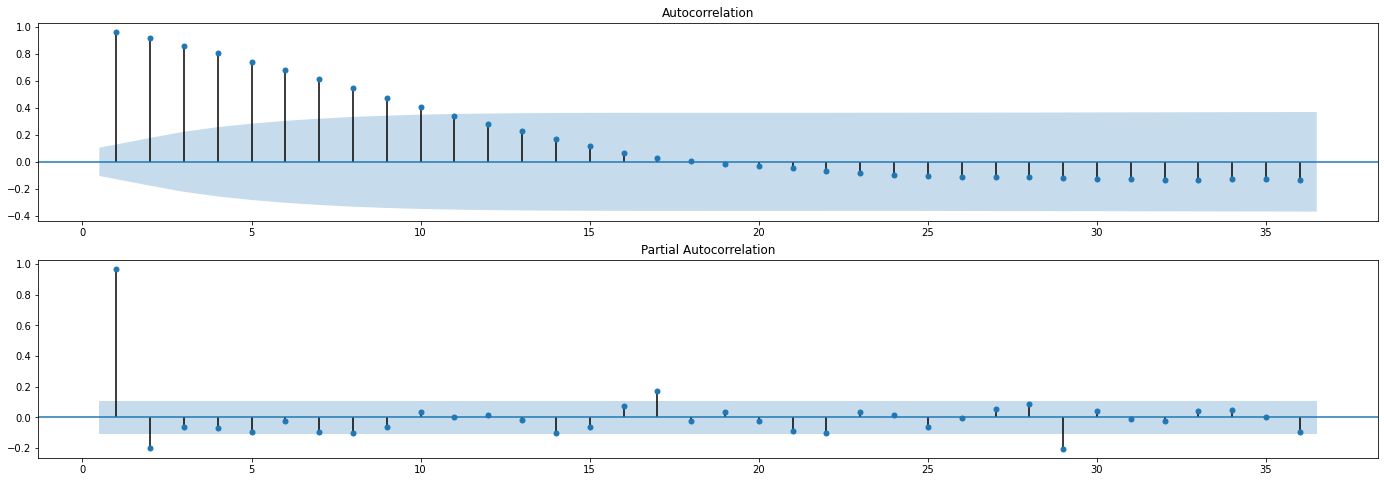

In [ ]:
corr(apartment_rm['profit'])

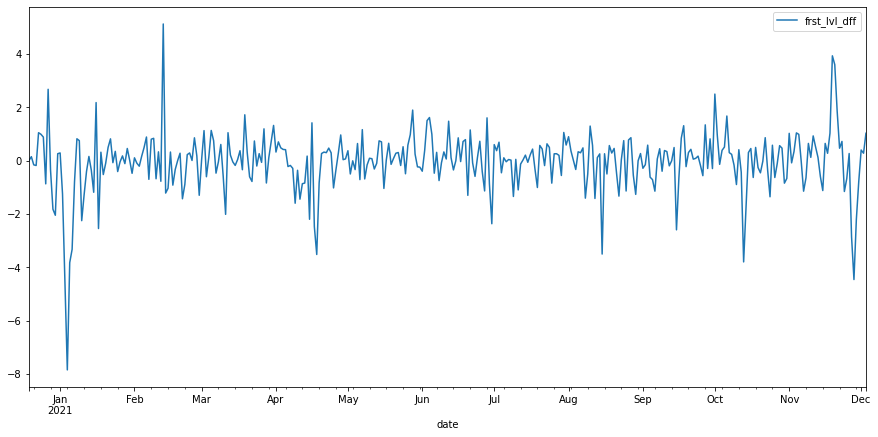

In [ ]:
apartment_rm = firstlvldiff(apartment_rm)

In [ ]:
adfTest(apartment_rm['frst_lvl_dff'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -6.209565
p-value: 0.000000
No. of lags: 8
Num of obs: 341
Critical Values:
	1%: -3.450, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(apartment_rm['frst_lvl_dff'])

Global Mean: 0.06
Global Standard Deviation: 1.14
Number of Samples: 183.00
Local Mean: 0.09

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  0.365261785289647
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC           Q          Prob
lag                                               
1.0   0.299146  0.300003   31.590106  1.903972e-08
2.0   0.118609  0.032186   36.570569  1.144991e-08
3.0   0.098542  0.060615   40.018207  1.056082e-08
4.0   0.073849  0.028832   41.960084  1.700247e-08
5.0  -0.037503 -0.083712   42.462344  4.748444e-08
6.0   0.046263  0.078096   43.228861  1.050901e-07
7.0   0.154102  0.139218   51.758511  6.514607e-09
8.0  -0.060586 -0.165879   53.080826  1.040306e-08
9.0  -0.110537 -0.080018   57.495193  4.061906e-09
10.0 -0.028306  0.019005   57.785530  9.486919e-09
11.0 -0.039437 -0.024457   58.350742  1.874280e-08
12.0 -0.108961 -0.059971   62.678251  7.302244e-09
13.0  0.023966  0.072929   62.888228  1.590357e-08
14.0  0.078352  0.043991   65.139185  1.444753e-08
15.0 -0.000962  0.005121   65.139525  3.229827e-08
16.0 -0.058603 -0.055484   66.406322  4.213695e-08
17.0  0.009472  0.002229   66.439518  8.765471e-08
18.0 -0.042938 -0.043956   67.1

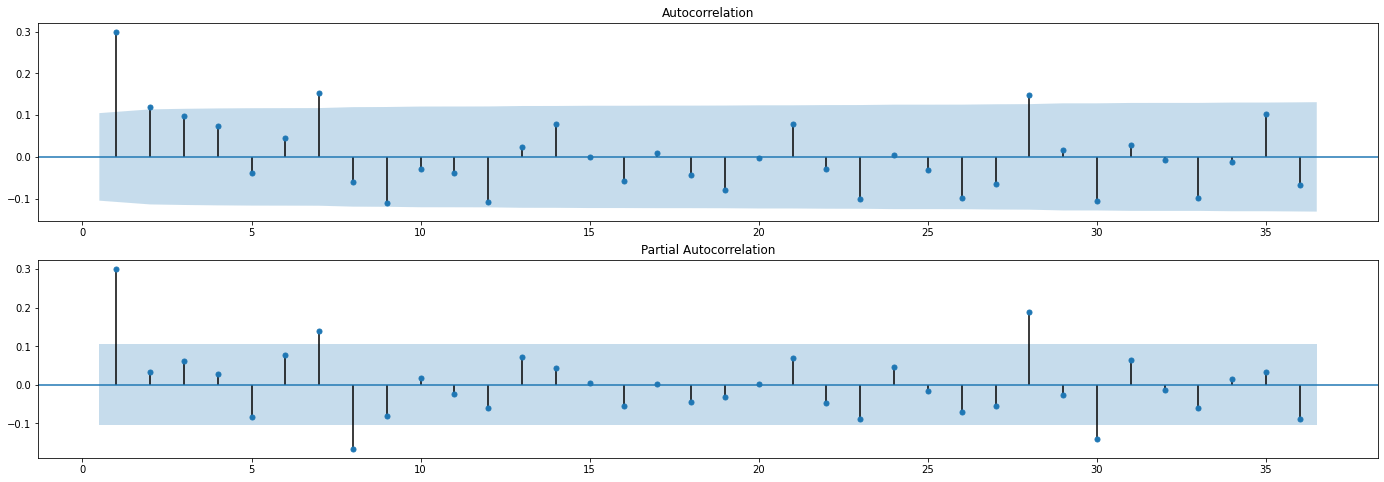

In [ ]:
corr(apartment_rm['frst_lvl_dff'])

In [ ]:
p = [1,2] # AR = PCF
d = [1] # diffrence
q = [1] # MA = ACF
pdq = list(itertools.product(p, d, q))
print("PDQ are", pdq)

PDQ are [(1, 1, 1), (2, 1, 1)]


In [ ]:
aic_list = []
bic_list = []
hqic_list = []
pdq_models = []
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        mod = ARIMA(calendar_day['frst_lvl_dff'], order=param)
        results = mod.fit()
        # AIC - Aikake, BIC - schwarz criterion, HQIC - Hannan-Quinn
        print('ARIMA{}\tAIC:{:,}\t BIC:{:,}\t HQIC:{:,}'.format(param, round(results.aic, 2), round(results.bic, 2), round(results.hqic, 2)))
        pdq_models.append(param)
        aic_list.append(results.aic)
        bic_list.append(results.bic)
        hqic_list.append(results.hqic)
    except:
        continue

ARIMA(1, 1, 1)	AIC:7,447.33	 BIC:7,462.75	 HQIC:7,453.47
ARIMA(2, 1, 1)	AIC:7,442.35	 BIC:7,461.63	 HQIC:7,450.03


In [ ]:
print('ARIMA model with lowest AIC', pdq_models[aic_list.index(min(aic_list))])
print('ARIMA model with lowest BIC', pdq_models[bic_list.index(min(bic_list))])
print('ARIMA model with lowest HQIC', pdq_models[hqic_list.index(min(hqic_list))])

ARIMA model with lowest AIC (2, 1, 1)
ARIMA model with lowest BIC (2, 1, 1)
ARIMA model with lowest HQIC (2, 1, 1)


In [ ]:
mod211 = ARIMA(apartment_rm['profit'], order=(2, 1, 1))
apart_arima211 = mod211.fit()

In [ ]:
# Make Predictions until 2022 February
apart_arima211_pred = apart_arima211.predict("2020-12-27", "2022-02-1", typ='levels')

# Get Confidence Intervals of the new unobserved dates
apart_arima211_conf_int = pd.DataFrame(apart_arima211.forecast(59)[2], columns=['min', 'max'])
ind_slice = len(apart_arima211_pred) - len(apart_arima211_conf_int)
apart_arima211_conf_int.index = apart_arima211_pred.index[ind_slice:]

            AC       PAC          Q          Prob
lag                                              
1.0   0.003883  0.003894   0.005307  9.419260e-01
2.0  -0.021897 -0.022039   0.174573  9.164144e-01
3.0   0.025988  0.026400   0.413678  9.374026e-01
4.0   0.043220  0.043063   1.076951  8.979117e-01
5.0  -0.100533 -0.101489   4.676037  4.566810e-01
6.0   0.010476  0.013161   4.715235  5.808199e-01
7.0   0.185623  0.185407  17.056747  1.703391e-02
8.0  -0.088018 -0.093815  19.839811  1.095939e-02
9.0  -0.110786 -0.104856  24.261865  3.905952e-03
10.0  0.010257 -0.004487  24.299884  6.842977e-03
11.0 -0.005140 -0.015476  24.309459  1.148979e-02
12.0 -0.125159 -0.088496  30.003608  2.788940e-03
13.0  0.042344  0.036231  30.657320  3.782839e-03
14.0  0.096293  0.052741  34.047939  2.029420e-03
15.0 -0.000519  0.037399  34.048038  3.352869e-03
16.0 -0.069101 -0.041382  35.804580  3.079730e-03
17.0  0.043917  0.005652  36.516227  3.911250e-03
18.0 -0.027776 -0.034236  36.801747  5.561031e-03


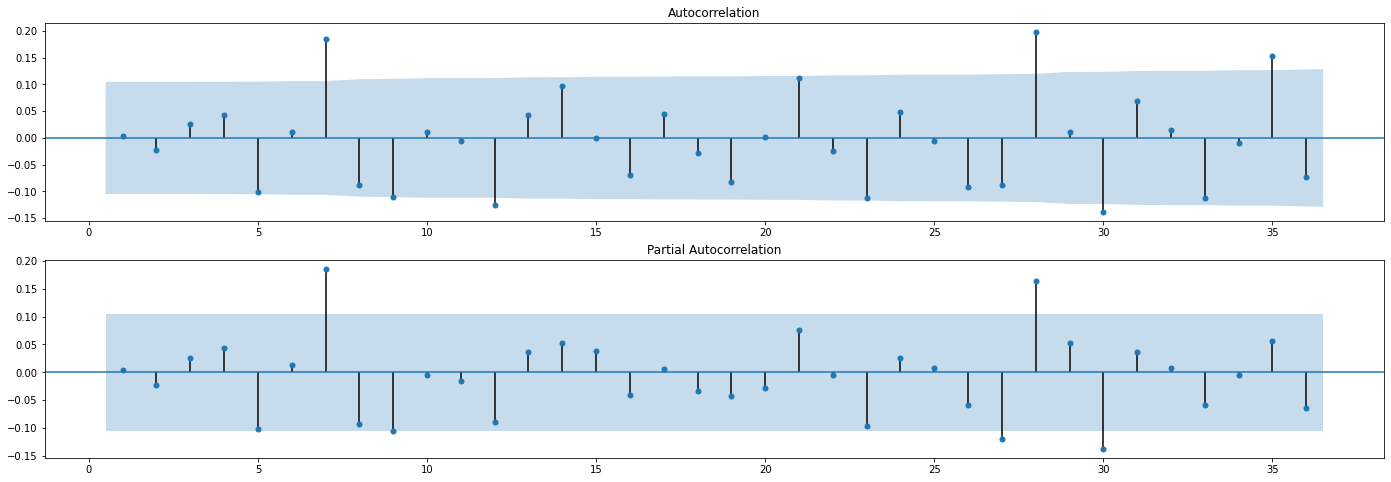

In [ ]:
check_resid(apart_arima211)

In [ ]:
rmse = sqrt(mean_squared_error(apartment_rm['profit'][8:350], apart_arima211_pred[:342]))
print('Test RMSE: {:,.3f}'.format(rmse))

Test RMSE: 1.090


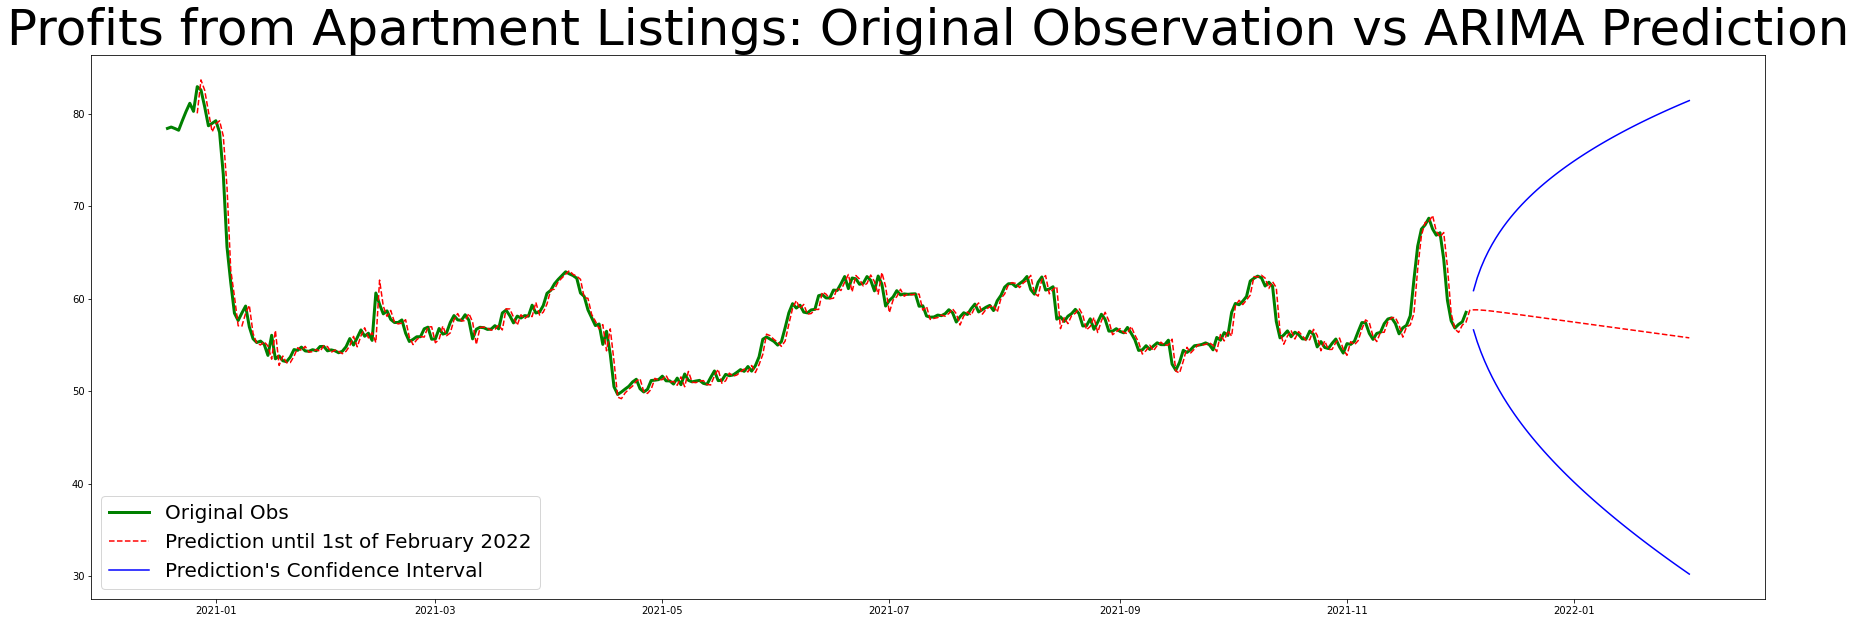

In [ ]:
show_plot(apartment_rm, apart_arima211_pred, apart_arima211_conf_int, "Profits from Apartment Listings")

### ARIMA for Mean Profit from Private Room Listings per Day

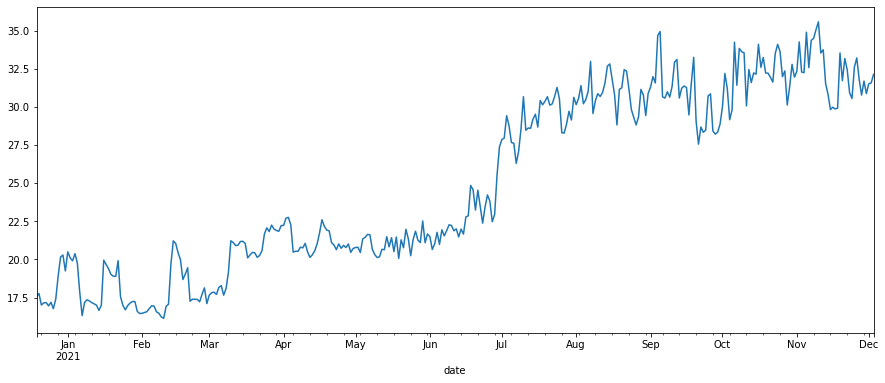

In [ ]:
plt.figure(figsize=(15,6))
private_rm['profit'].plot()
plt.show()

In [ ]:
adfTest(private_rm['profit'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -0.459440
p-value: 0.899692
No. of lags: 16
Num of obs: 333
Critical Values:
	1%: -3.450, therefore, fail to reject null hypothesis
	5%: -2.870, therefore, fail to reject null hypothesis
	10%: -2.571, therefore, fail to reject null hypothesis

For a 5% critical value, the data is Non-stationary


In [ ]:
globVSloc(private_rm['profit'])

Global Mean: 24.96
Global Standard Deviation: 5.83
Number of Samples: 183.00
Local Mean: 19.83

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -11.89254647470854
Therefore, Reject H0
Data is: Not Stationary


            AC       PAC            Q           Prob
lag                                                 
1.0   0.977461  0.980262   337.275259   2.501944e-75
2.0   0.961410  0.154058   664.501979  5.072578e-145
3.0   0.949473  0.126792   984.573055  3.996521e-213
4.0   0.939194  0.080369  1298.656646  6.507663e-280
5.0   0.927248 -0.011808  1605.688221   0.000000e+00
6.0   0.924293  0.244373  1911.653369   0.000000e+00
7.0   0.919219  0.032784  2215.150334   0.000000e+00
8.0   0.905797 -0.183138  2510.711102   0.000000e+00
9.0   0.895184  0.028574  2800.232408   0.000000e+00
10.0  0.890805  0.141639  3087.771395   0.000000e+00
11.0  0.886087  0.086431  3373.112288   0.000000e+00
12.0  0.882083  0.070513  3656.716696   0.000000e+00
13.0  0.879806  0.005891  3939.695827   0.000000e+00
14.0  0.880746  0.170777  4224.124165   0.000000e+00
15.0  0.870356 -0.168950  4502.710478   0.000000e+00
16.0  0.862331 -0.014245  4777.001590   0.000000e+00
17.0  0.860287  0.136127  5050.814178   0.0000

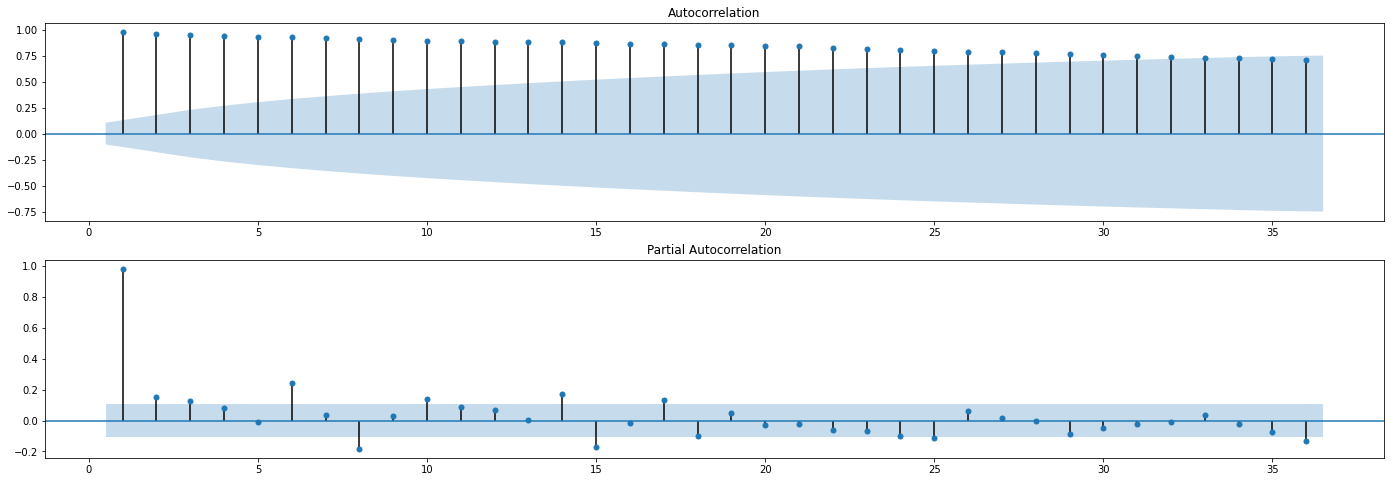

In [ ]:
corr(private_rm['profit'])

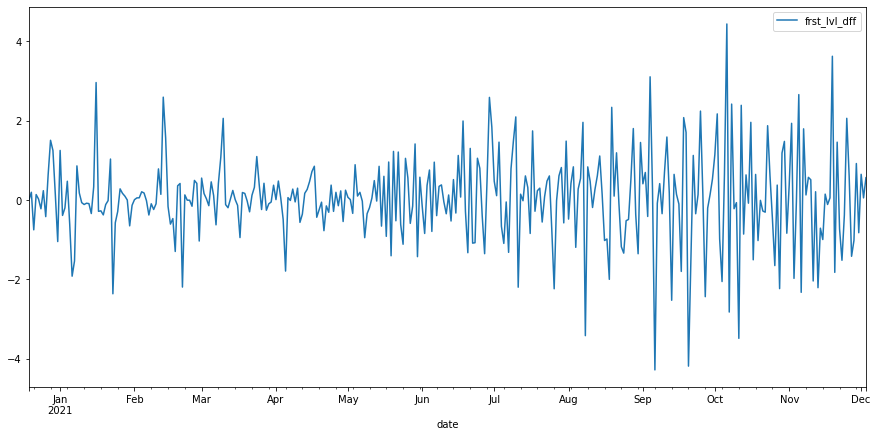

In [ ]:
private_rm = firstlvldiff(private_rm)

In [ ]:
adfTest(private_rm['frst_lvl_dff'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -6.238481
p-value: 0.000000
No. of lags: 15
Num of obs: 334
Critical Values:
	1%: -3.450, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(private_rm['frst_lvl_dff'])

Global Mean: 0.04
Global Standard Deviation: 1.11
Number of Samples: 183.00
Local Mean: 0.04

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -0.04110172091136638
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC           Q          Prob
lag                                               
1.0  -0.168274 -0.168756    9.995795  1.568981e-03
2.0  -0.127314 -0.161112   15.734074  3.831679e-04
3.0  -0.034094 -0.091585   16.146785  1.058050e-03
4.0   0.031401 -0.014775   16.497884  2.418924e-03
5.0  -0.238834 -0.273330   36.867574  6.366961e-07
6.0   0.044298 -0.070384   37.570340  1.362894e-06
7.0   0.198700  0.133027   51.751589  6.535096e-09
8.0  -0.058361 -0.035430   52.978559  1.088813e-08
9.0  -0.113705 -0.103012   57.649611  3.794258e-09
10.0  0.023316 -0.072836   57.846604  9.239115e-09
11.0 -0.044017 -0.100861   58.550742  1.721251e-08
12.0 -0.079321 -0.070281   60.844099  1.583205e-08
13.0 -0.044526 -0.157996   61.568878  2.748891e-08
14.0  0.275355  0.158404   89.369700  4.991394e-13
15.0 -0.009427  0.059207   89.402382  1.281978e-12
16.0 -0.157677 -0.145858   98.573017  6.407998e-14
17.0  0.097726  0.068837  102.106359  3.616069e-14
18.0 -0.022225 -0.050844  102.2

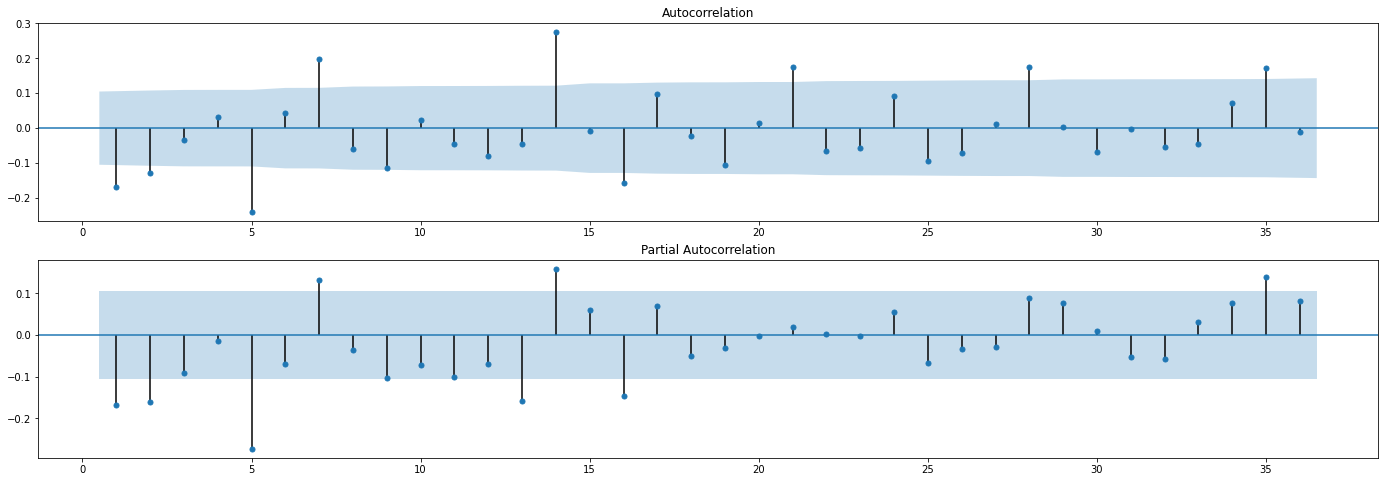

In [ ]:
corr(private_rm['frst_lvl_dff'])

In [ ]:
p = [1,2,5] # AR = PCF
d = [1] # diffrence
q = [1,2,5] # MA = ACF
pdq = list(itertools.product(p, d, q))
print("PDQ are", pdq)

PDQ are [(1, 1, 1), (1, 1, 2), (1, 1, 5), (2, 1, 1), (2, 1, 2), (2, 1, 5), (5, 1, 1), (5, 1, 2), (5, 1, 5)]


In [ ]:
aic_list = []
bic_list = []
hqic_list = []
pdq_models = []
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        mod = ARIMA(calendar_day['frst_lvl_dff'], order=param)
        results = mod.fit()
        # AIC - Aikake, BIC - schwarz criterion, HQIC - Hannan-Quinn
        print('ARIMA{}\tAIC:{:,}\t BIC:{:,}\t HQIC:{:,}'.format(param, round(results.aic, 2), round(results.bic, 2), round(results.hqic, 2)))
        pdq_models.append(param)
        aic_list.append(results.aic)
        bic_list.append(results.bic)
        hqic_list.append(results.hqic)
    except:
        continue

ARIMA(1, 1, 1)	AIC:7,447.33	 BIC:7,462.75	 HQIC:7,453.47
ARIMA(1, 1, 2)	AIC:7,441.17	 BIC:7,460.44	 HQIC:7,448.84
ARIMA(1, 1, 5)	AIC:7,446.92	 BIC:7,477.76	 HQIC:7,459.19
ARIMA(2, 1, 1)	AIC:7,442.35	 BIC:7,461.63	 HQIC:7,450.03
ARIMA(2, 1, 2)	AIC:7,442.04	 BIC:7,465.17	 HQIC:7,451.25
ARIMA(5, 1, 1)	AIC:7,444.76	 BIC:7,475.6	 HQIC:7,457.04
ARIMA(5, 1, 2)	AIC:7,440.35	 BIC:7,475.05	 HQIC:7,454.16


In [ ]:
print('ARIMA model with lowest AIC', pdq_models[aic_list.index(min(aic_list))])
print('ARIMA model with lowest BIC', pdq_models[bic_list.index(min(bic_list))])
print('ARIMA model with lowest HQIC', pdq_models[hqic_list.index(min(hqic_list))])

ARIMA model with lowest AIC (5, 1, 2)
ARIMA model with lowest BIC (1, 1, 2)
ARIMA model with lowest HQIC (1, 1, 2)


In [ ]:
mod512 = ARIMA(private_rm['profit'], order=(5, 1, 2))
priv_arima512 = mod512.fit()

In [ ]:
# Make Predictions until 2022 February
priv_arima512_pred = priv_arima512.predict("2020-12-27", "2022-02-1", typ='levels')

# Get Confidence Intervals of the new unobserved dates
priv_arima512_conf_int = pd.DataFrame(priv_arima512.forecast(59)[2], columns=['min', 'max'])
ind_slice = len(priv_arima512_pred) - len(priv_arima512_conf_int)
priv_arima512_conf_int.index = priv_arima512_pred.index[ind_slice:]

            AC       PAC          Q      Prob
lag                                          
1.0  -0.022700 -0.022765   0.181389  0.670182
2.0  -0.017713 -0.018343   0.292147  0.864094
3.0  -0.018262 -0.019268   0.410227  0.938122
4.0  -0.059541 -0.061514   1.669002  0.796341
5.0  -0.042695 -0.047178   2.318132  0.803600
6.0  -0.062508 -0.069147   3.713552  0.715374
7.0  -0.019067 -0.027873   3.843765  0.797587
8.0  -0.029415 -0.040736   4.154581  0.842914
9.0   0.021658  0.010332   4.323586  0.888854
10.0 -0.132857 -0.151316  10.701794  0.381218
11.0 -0.111112 -0.139236  15.176207  0.174571
12.0  0.063735  0.037863  16.652787  0.163132
13.0 -0.069911 -0.093988  18.434704  0.141701
14.0  0.168653  0.148842  28.835711  0.010998
15.0  0.049965  0.031026  29.751328  0.012850
16.0 -0.071112 -0.102188  31.611616  0.011229
17.0  0.035030  0.016170  32.064376  0.014773
18.0 -0.055877 -0.066410  33.219882  0.015696
19.0  0.003752  0.007825  33.225108  0.022642
20.0  0.013659  0.018517  33.29457

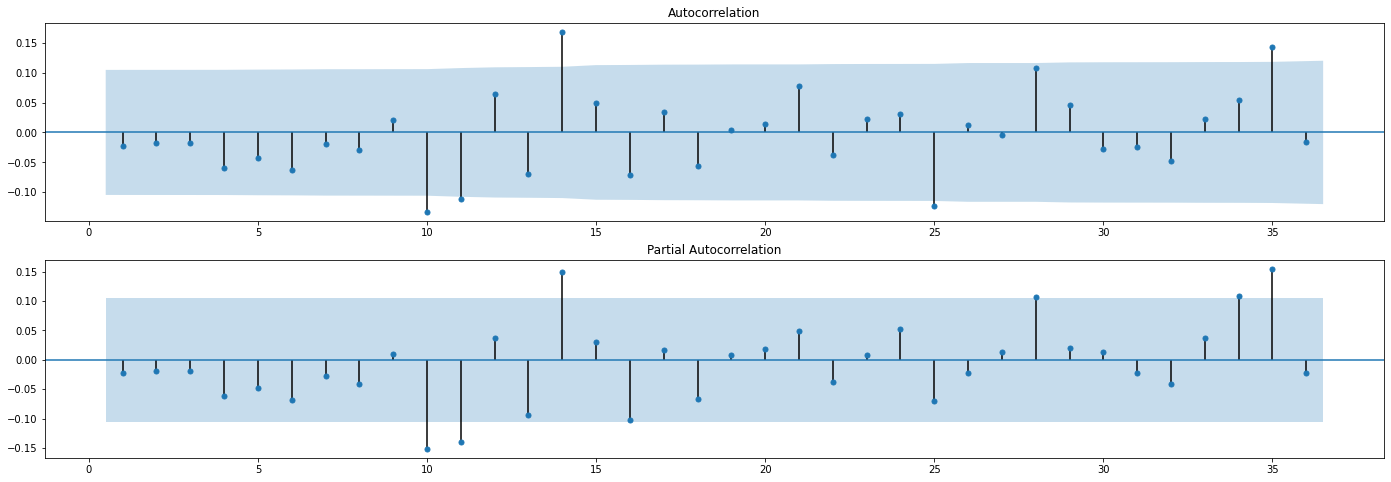

In [ ]:
check_resid(priv_arima512)

In [ ]:
rmse = sqrt(mean_squared_error(private_rm['profit'][8:350], priv_arima512_pred[:342]))
print('Test RMSE: {:,.3f}'.format(rmse))

Test RMSE: 1.029


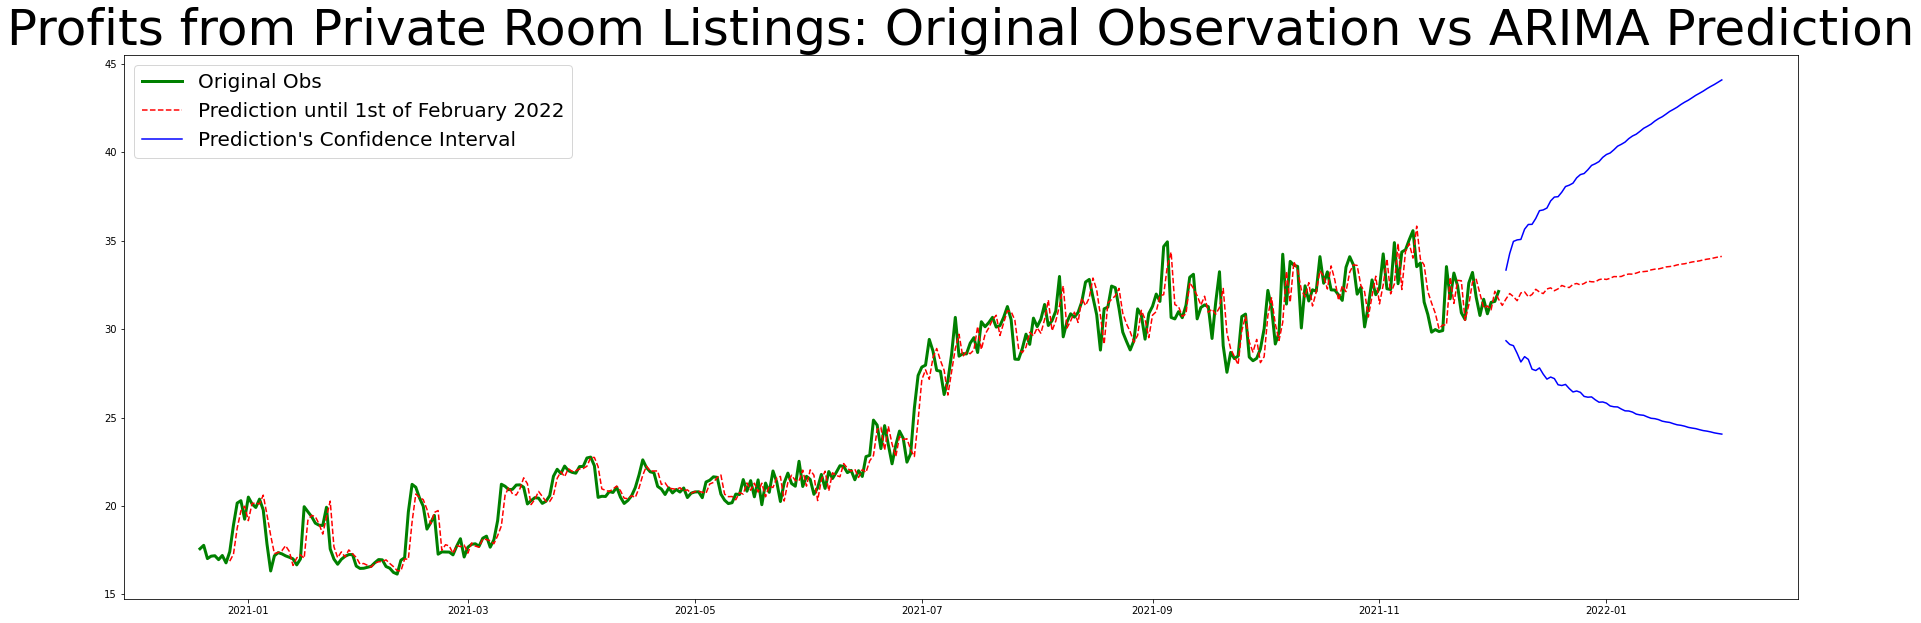

In [ ]:
show_plot(private_rm, priv_arima512_pred, priv_arima512_conf_int, "Profits from Private Room Listings")

### ARIMA for Mean Profit from Shared Room Listings per Day

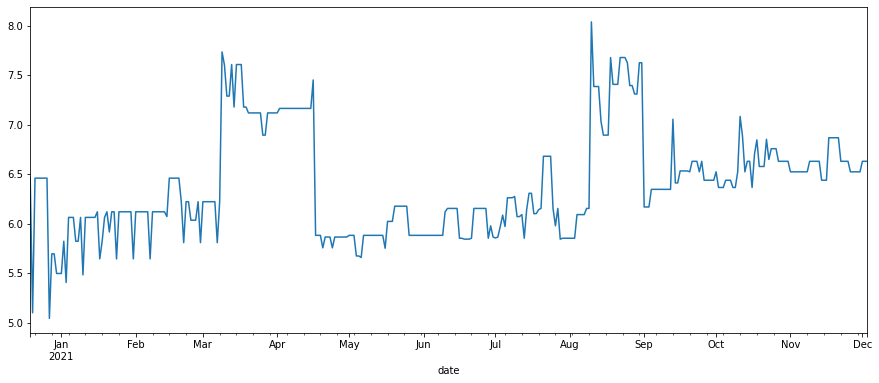

In [ ]:
plt.figure(figsize=(15,6))
shared_rm['profit'].plot()
plt.show()

In [ ]:
adfTest(shared_rm['profit'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -3.342779
p-value: 0.013071
No. of lags: 8
Num of obs: 341
Critical Values:
	1%: -3.450, therefore, fail to reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(shared_rm['profit'])

Global Mean: 6.38
Global Standard Deviation: 0.53
Number of Samples: 183.00
Local Mean: 6.25

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -3.3637588211762646
Therefore, Reject H0
Data is: Not Stationary


            AC       PAC            Q           Prob
lag                                                 
1.0   0.857221  0.859677   259.400425   2.318514e-58
2.0   0.791799  0.219597   481.353623  2.988056e-105
3.0   0.747228  0.123362   679.592118  5.586611e-147
4.0   0.698729  0.026818   853.433114  2.044137e-183
5.0   0.652450  0.005276  1005.447990  3.975542e-215
6.0   0.621034  0.047669  1143.576543  7.770847e-244
7.0   0.624182  0.166955  1283.515827  6.118202e-273
8.0   0.552667 -0.204106  1393.545839  1.407213e-295
9.0   0.498587 -0.074019  1483.358659   0.000000e+00
10.0  0.469512  0.030842  1563.236420   0.000000e+00
11.0  0.444515  0.051208  1635.046233   0.000000e+00
12.0  0.416993  0.020284  1698.426151   0.000000e+00
13.0  0.381917 -0.053844  1751.749548   0.000000e+00
14.0  0.376513  0.037368  1803.728859   0.000000e+00
15.0  0.311538 -0.154891  1839.422280   0.000000e+00
16.0  0.281412  0.051141  1868.633384   0.000000e+00
17.0  0.275129  0.081249  1896.638582   0.0000

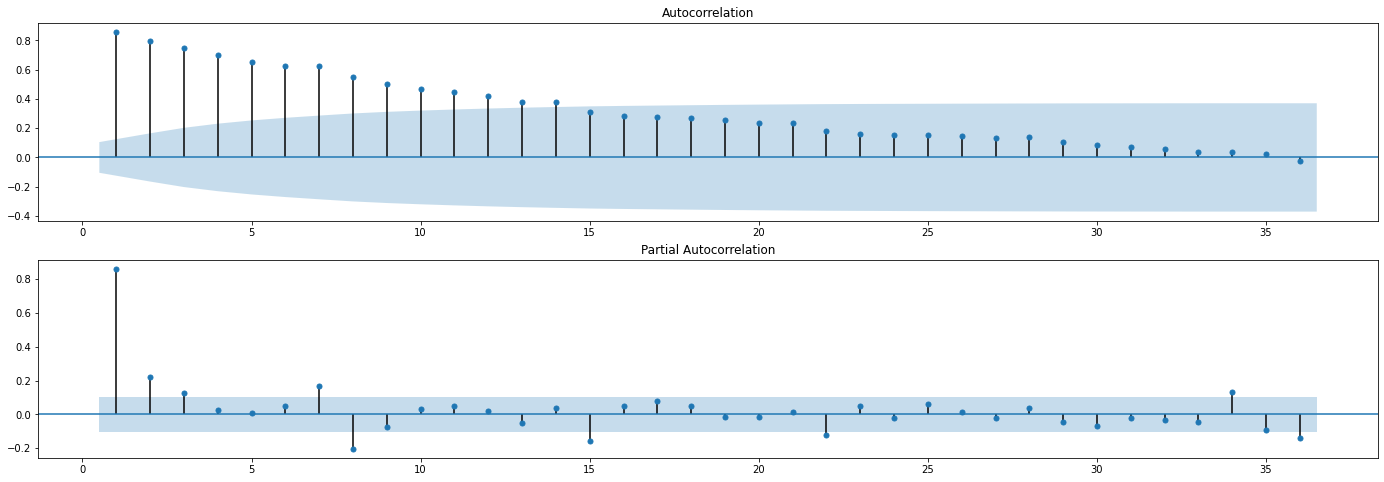

In [ ]:
corr(shared_rm['profit'])

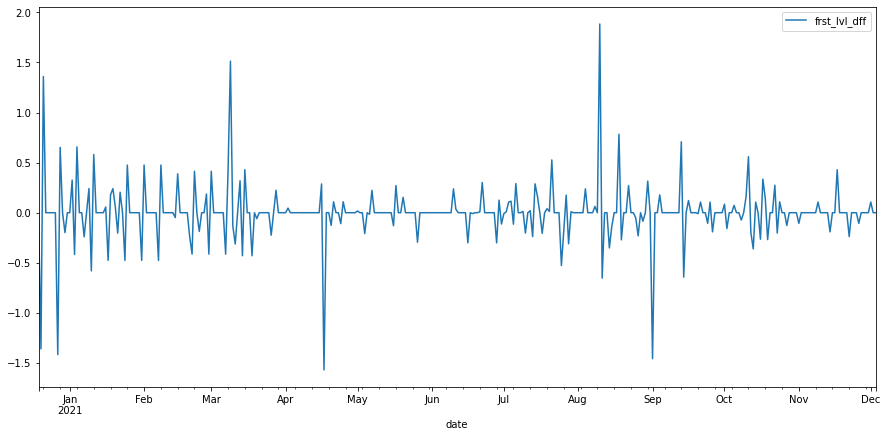

In [ ]:
shared_rm = firstlvldiff(shared_rm)

In [ ]:
adfTest(shared_rm['frst_lvl_dff'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -5.737191
p-value: 0.000001
No. of lags: 15
Num of obs: 334
Critical Values:
	1%: -3.450, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(shared_rm['frst_lvl_dff'])

Global Mean: 0.00
Global Standard Deviation: 0.28
Number of Samples: 183.00
Local Mean: 0.00

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  0.13807519318404246
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC           Q          Prob
lag                                               
1.0  -0.267828 -0.268595   25.321971  4.851511e-07
2.0  -0.076941 -0.161153   27.417741  1.112534e-06
3.0   0.014730 -0.058159   27.494774  4.636209e-06
4.0  -0.007795 -0.036203   27.516410  1.562864e-05
5.0  -0.052176 -0.075424   28.488545  2.920797e-05
6.0  -0.121330 -0.185503   33.760667  7.482417e-06
7.0   0.262089  0.179533   58.433302  3.099631e-10
8.0  -0.058273  0.042544   59.656554  5.443005e-10
9.0  -0.089585 -0.060902   62.556068  4.300610e-10
10.0 -0.014329 -0.076747   62.630464  1.148099e-09
11.0  0.009388 -0.043395   62.662493  2.957281e-09
12.0  0.024389  0.024879   62.879308  6.706703e-09
13.0 -0.104183 -0.064434   66.847324  3.038256e-09
14.0  0.208194  0.124317   82.740351  8.750826e-12
15.0 -0.121205 -0.082292   88.142993  2.199390e-12
16.0 -0.085523 -0.105900   90.840893  1.750770e-12
17.0  0.001592 -0.065280   90.841831  4.289624e-12
18.0  0.033596 -0.001962   91.2

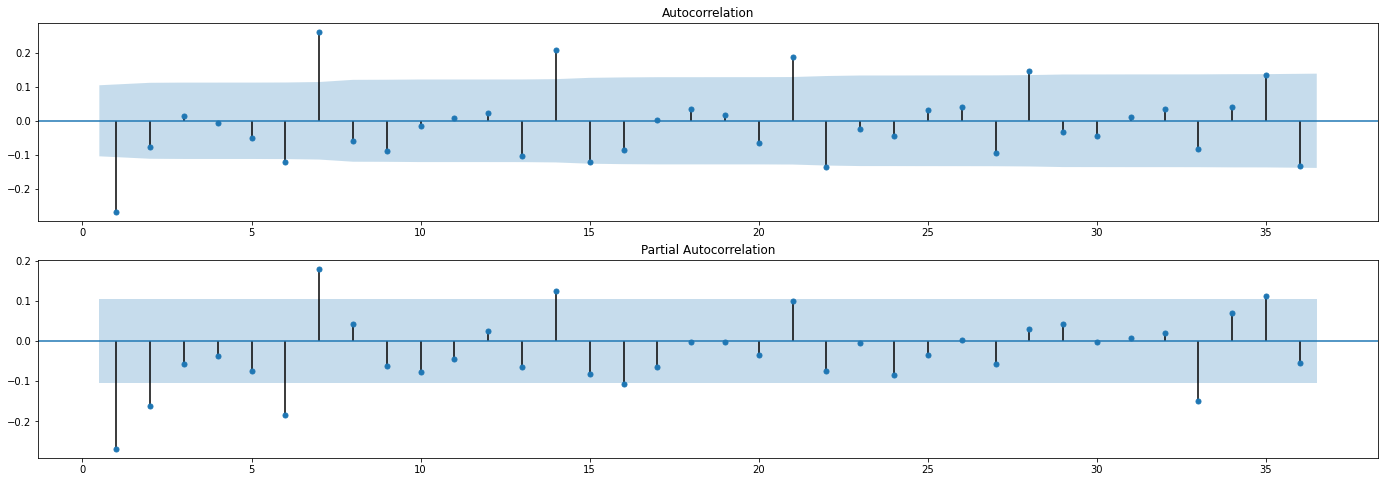

In [ ]:
corr(shared_rm['frst_lvl_dff'])

In [ ]:
p = [1,2,6] # AR = PCF
d = [1] # diffrence
q = [1,6] # MA = ACF
pdq = list(itertools.product(p, d, q))
print("PDQ are", pdq)

PDQ are [(1, 1, 1), (1, 1, 6), (2, 1, 1), (2, 1, 6), (6, 1, 1), (6, 1, 6)]


In [ ]:
aic_list = []
bic_list = []
hqic_list = []
pdq_models = []
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        mod = ARIMA(calendar_day['frst_lvl_dff'], order=param)
        results = mod.fit()
        # AIC - Aikake, BIC - schwarz criterion, HQIC - Hannan-Quinn
        print('ARIMA{}\tAIC:{:,}\t BIC:{:,}\t HQIC:{:,}'.format(param, round(results.aic, 2), round(results.bic, 2), round(results.hqic, 2)))
        pdq_models.append(param)
        aic_list.append(results.aic)
        bic_list.append(results.bic)
        hqic_list.append(results.hqic)
    except:
        continue

ARIMA(1, 1, 1)	AIC:7,447.33	 BIC:7,462.75	 HQIC:7,453.47
ARIMA(1, 1, 6)	AIC:7,448.88	 BIC:7,483.58	 HQIC:7,462.69
ARIMA(2, 1, 1)	AIC:7,442.35	 BIC:7,461.63	 HQIC:7,450.03
ARIMA(6, 1, 1)	AIC:7,446.7	 BIC:7,481.4	 HQIC:7,460.51


In [ ]:
print('ARIMA model with lowest AIC', pdq_models[aic_list.index(min(aic_list))])
print('ARIMA model with lowest BIC', pdq_models[bic_list.index(min(bic_list))])
print('ARIMA model with lowest HQIC', pdq_models[hqic_list.index(min(hqic_list))])

ARIMA model with lowest AIC (2, 1, 1)
ARIMA model with lowest BIC (2, 1, 1)
ARIMA model with lowest HQIC (2, 1, 1)


In [ ]:
mod211 = ARIMA(shared_rm['profit'], order=(2, 1, 1))
shrd_arima211 = mod211.fit()

In [ ]:
# Make Predictions until 2022 February
shrd_arima211_pred = shrd_arima211.predict("2020-12-27", "2022-02-1", typ='levels')

# Get Confidence Intervals of the new unobserved dates
shrd_arima211_conf_int = pd.DataFrame(shrd_arima211.forecast(59)[2], columns=['min', 'max'])
ind_slice = len(shrd_arima211_pred) - len(shrd_arima211_conf_int)
shrd_arima211_conf_int.index = shrd_arima211_pred.index[ind_slice:]

            AC       PAC          Q      Prob
lag                                          
1.0   0.004432  0.004444   0.006913  0.933736
2.0  -0.024343 -0.024504   0.216115  0.897576
3.0   0.041715  0.042323   0.832195  0.841752
4.0   0.006305  0.005363   0.846310  0.932134
5.0  -0.055967 -0.054903   1.961723  0.854416
6.0  -0.076300 -0.078942   4.040908  0.671140
7.0   0.226502  0.231267  22.416831  0.002152
8.0  -0.029167 -0.035792  22.722444  0.003739
9.0  -0.103382 -0.096503  26.573209  0.001645
10.0 -0.041115 -0.065340  27.184050  0.002435
11.0 -0.005799 -0.010493  27.196236  0.004292
12.0 -0.001727  0.027556  27.197320  0.007237
13.0 -0.075372 -0.046161  29.268489  0.005995
14.0  0.147263  0.094030  37.198526  0.000688
15.0 -0.116843 -0.147394  42.205657  0.000209
16.0 -0.121121 -0.087679  47.602384  0.000055
17.0 -0.028277 -0.020222  47.897414  0.000089
18.0  0.020830  0.028921  48.057984  0.000148
19.0  0.006960  0.002314  48.075964  0.000250
20.0 -0.035172 -0.013493  48.53657

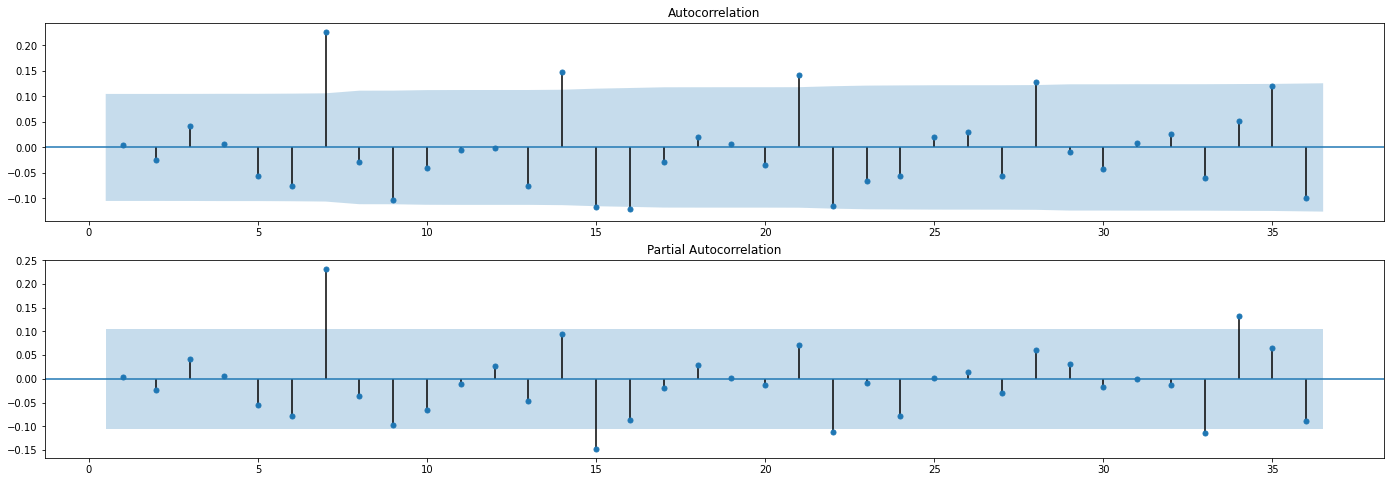

In [ ]:
check_resid(shrd_arima211)

In [ ]:
rmse = sqrt(mean_squared_error(shared_rm['profit'][8:350], shrd_arima211_pred[:342]))
print('Test RMSE: {:,.3f}'.format(rmse))

Test RMSE: 0.255


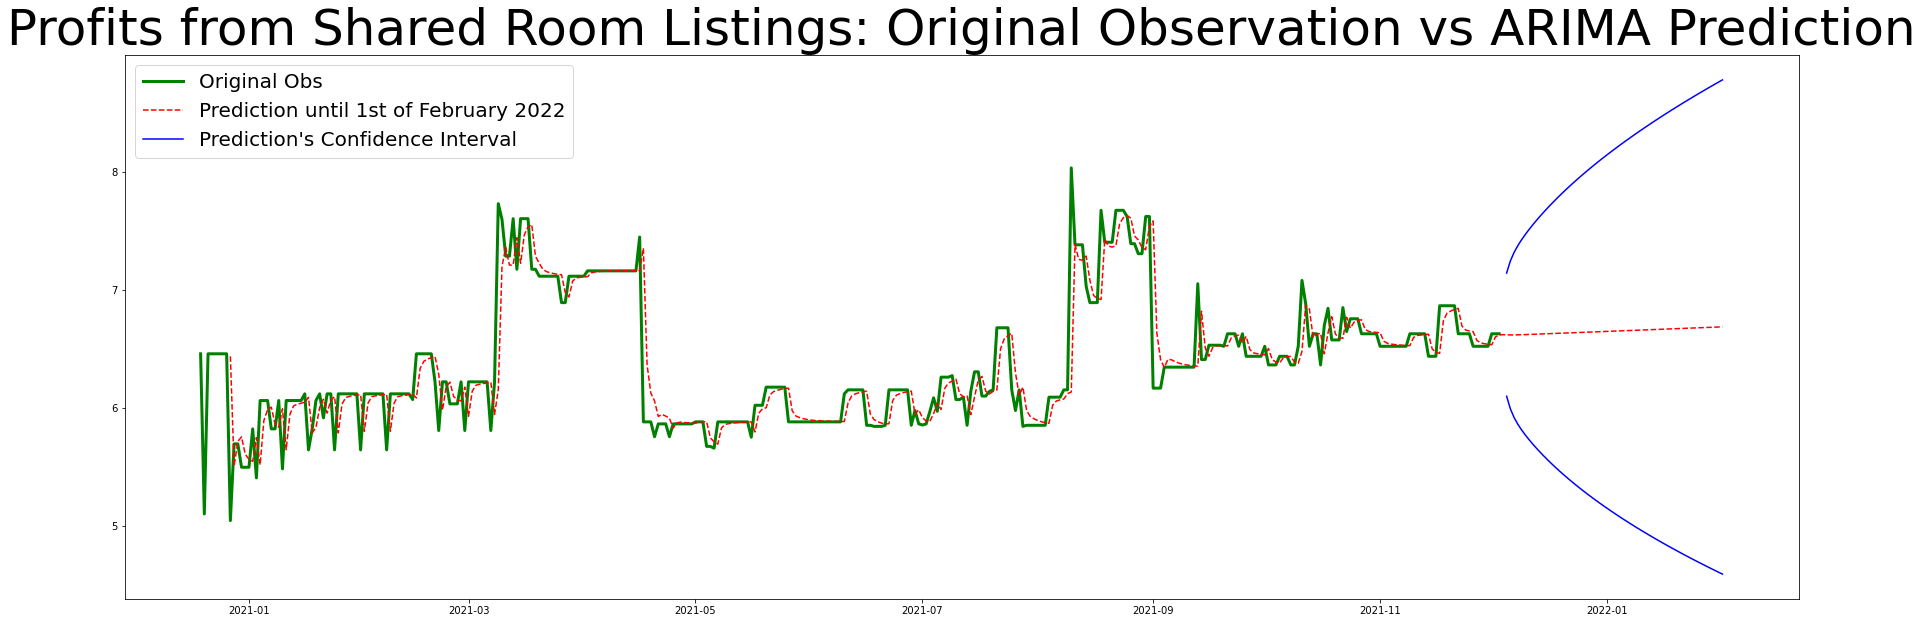

In [ ]:
show_plot(shared_rm, shrd_arima211_pred, shrd_arima211_conf_int, "Profits from Shared Room Listings")

### ARIMA for Mean Profit from Hotel Room Listings per Day

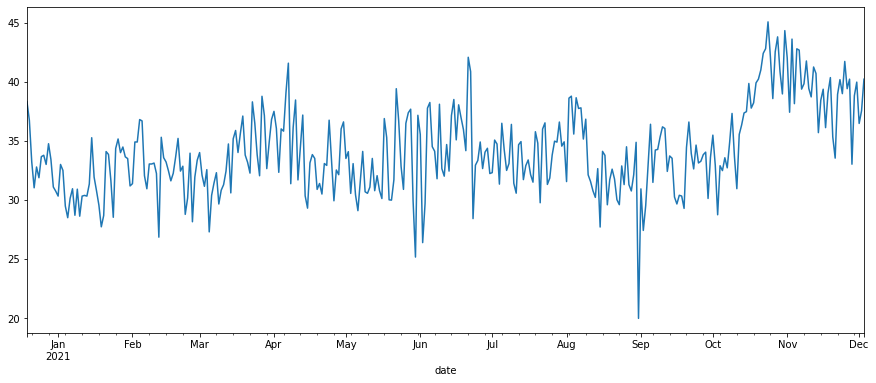

In [ ]:
plt.figure(figsize=(15,6))
hotel_rm['profit'].plot()
plt.show()

In [ ]:
adfTest(hotel_rm['profit'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -2.656220
p-value: 0.081925
No. of lags: 5
Num of obs: 344
Critical Values:
	1%: -3.450, therefore, fail to reject null hypothesis
	5%: -2.870, therefore, fail to reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(hotel_rm['profit'])

Global Mean: 34.17
Global Standard Deviation: 3.65
Number of Samples: 183.00
Local Mean: 33.14

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  -3.7974674264843546
Therefore, Reject H0
Data is: Not Stationary


            AC       PAC            Q           Prob
lag                                                 
1.0   0.592972  0.594671   124.123299   7.916814e-29
2.0   0.444420  0.144408   194.046037   7.301942e-43
3.0   0.545362  0.374132   299.643047   1.188567e-64
4.0   0.557288  0.205081   410.227395   1.715378e-87
5.0   0.481893  0.092749   493.153971  2.398323e-104
6.0   0.467523  0.092712   571.435176  3.375297e-120
7.0   0.438891 -0.008497   640.622979  4.327478e-134
8.0   0.407230 -0.001430   700.362832  5.978569e-146
9.0   0.408212  0.029922   760.567052  6.511784e-158
10.0  0.410349  0.045887   821.582400  4.722382e-170
11.0  0.362764 -0.015150   869.407995  2.333329e-179
12.0  0.334175 -0.009931   910.112423  3.868388e-187
13.0  0.343098  0.015087   953.146936  2.005847e-195
14.0  0.390920  0.125280  1009.180264  1.677933e-206
15.0  0.302817 -0.087624  1042.903332  8.543078e-213
16.0  0.261332 -0.025229  1068.094649  2.900953e-217
17.0  0.300112  0.012497  1101.416753  1.76219

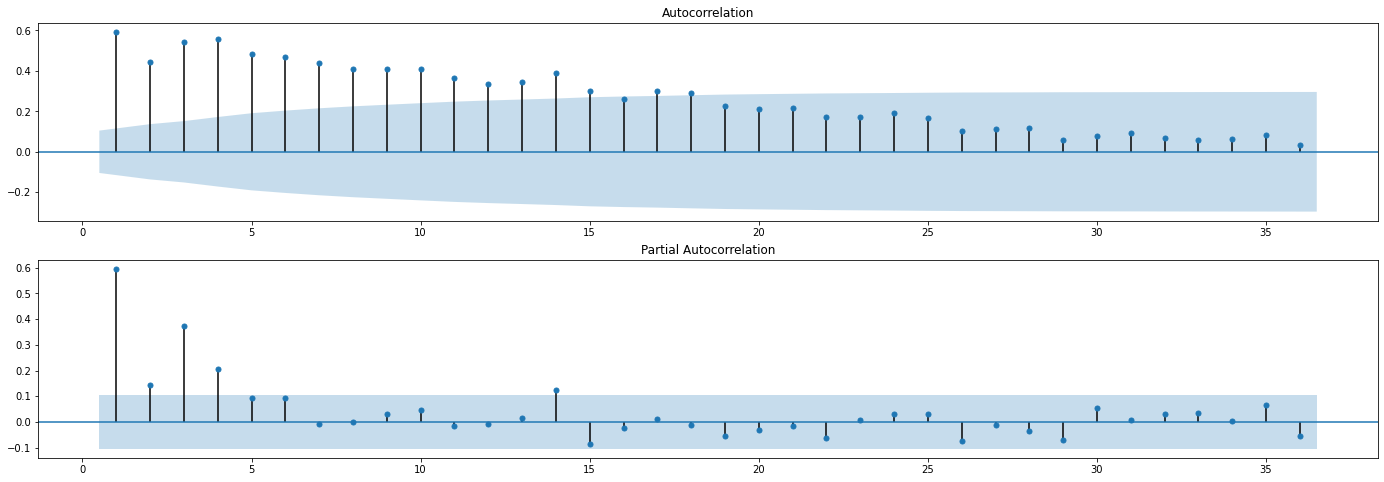

In [ ]:
corr(hotel_rm['profit'])

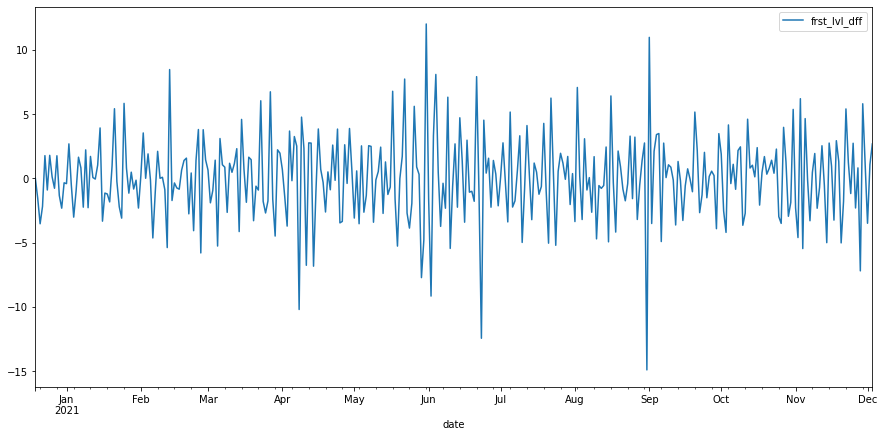

In [ ]:
hotel_rm = firstlvldiff(hotel_rm)

In [ ]:
adfTest(hotel_rm['frst_lvl_dff'])

H0: Data is non-stationary
Ha: Data is stationary 

ADF Statistic/ Test Statistic: -13.048631
p-value: 0.000000
No. of lags: 4
Num of obs: 345
Critical Values:
	1%: -3.449, therefore, reject null hypothesis
	5%: -2.870, therefore, reject null hypothesis
	10%: -2.571, therefore, reject null hypothesis

For a 5% critical value, the data is Stationary


In [ ]:
globVSloc(hotel_rm['frst_lvl_dff'])

Global Mean: 0.01
Global Standard Deviation: 3.27
Number of Samples: 183.00
Local Mean: 0.01

Hypothesis Testing using z

H0: Global Mean == Local Mean
Ha: Global Mean != Local Mean
Two-tailed Test
Confidence Level: 0.95
z range: -1.63 --- 1.63
z score is:  0.030695071793568802
Therefore, Fail to reject H0
Data is: Stationary


            AC       PAC           Q          Prob
lag                                               
1.0  -0.316050 -0.316956   35.261211  2.883176e-09
2.0  -0.305250 -0.452971   68.248178  1.513897e-15
3.0   0.107688 -0.246635   72.365500  1.329287e-15
4.0   0.108723 -0.119095   76.574510  9.253547e-16
5.0  -0.065607 -0.099573   78.111567  2.083296e-15
6.0   0.004051 -0.013728   78.117444  8.742735e-15
7.0   0.004952 -0.018007   78.126251  3.318159e-14
8.0  -0.043583 -0.066090   78.810496  8.481854e-14
9.0   0.001027 -0.077737   78.810877  2.783057e-13
10.0  0.061531 -0.016387   80.182766  4.622929e-13
11.0 -0.019052 -0.012650   80.314681  1.282755e-12
12.0 -0.037585 -0.017055   80.829592  2.866332e-12
13.0 -0.050938 -0.119290   81.778134  5.101188e-12
14.0  0.158222  0.085013   90.957396  2.501690e-13
15.0 -0.055416  0.012701   92.086778  4.040671e-13
16.0 -0.091904 -0.024503   95.202344  2.724599e-13
17.0  0.055746 -0.004108   96.352051  4.198448e-13
18.0  0.068462  0.043499   98.0

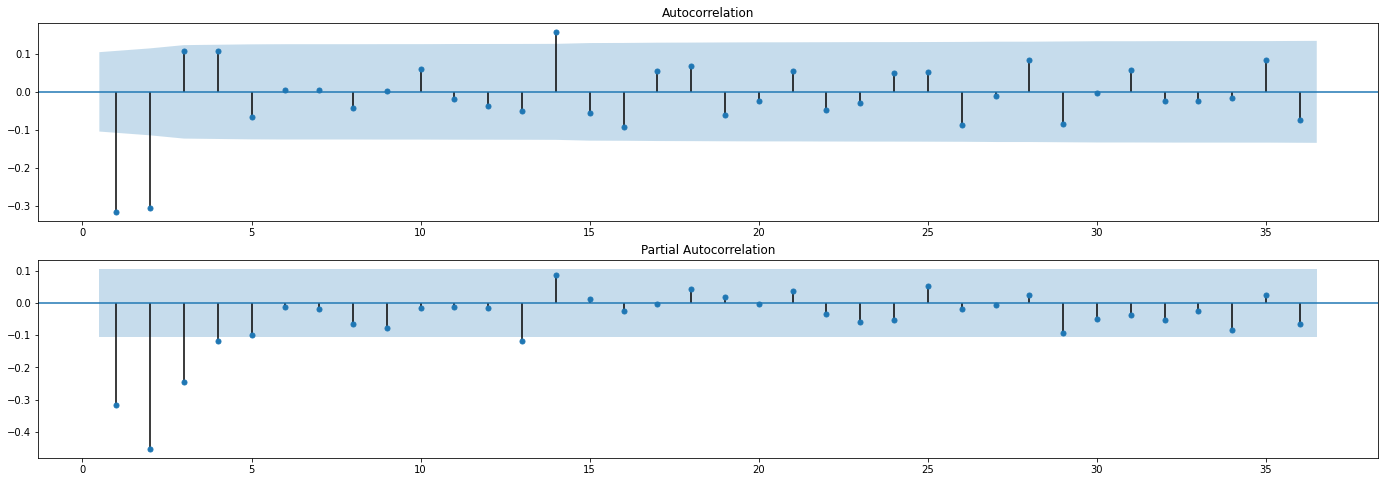

In [ ]:
corr(hotel_rm['frst_lvl_dff'])

In [ ]:
p = [1,2,3,4] # AR = PCF
d = [1] # diffrence
q = [1,2] # MA = ACF
pdq = list(itertools.product(p, d, q))
print("PDQ are", pdq)

PDQ are [(1, 1, 1), (1, 1, 2), (2, 1, 1), (2, 1, 2), (3, 1, 1), (3, 1, 2), (4, 1, 1), (4, 1, 2)]


In [ ]:
aic_list = []
bic_list = []
hqic_list = []
pdq_models = []
from statsmodels.tsa.arima_model import ARIMA
for param in pdq:
    try:
        mod = ARIMA(calendar_day['frst_lvl_dff'], order=param)
        results = mod.fit()
        # AIC - Aikake, BIC - schwarz criterion, HQIC - Hannan-Quinn
        print('ARIMA{}\tAIC:{:,}\t BIC:{:,}\t HQIC:{:,}'.format(param, round(results.aic, 2), round(results.bic, 2), round(results.hqic, 2)))
        pdq_models.append(param)
        aic_list.append(results.aic)
        bic_list.append(results.bic)
        hqic_list.append(results.hqic)
    except:
        continue

ARIMA(1, 1, 1)	AIC:7,447.33	 BIC:7,462.75	 HQIC:7,453.47
ARIMA(1, 1, 2)	AIC:7,441.17	 BIC:7,460.44	 HQIC:7,448.84
ARIMA(2, 1, 1)	AIC:7,442.35	 BIC:7,461.63	 HQIC:7,450.03
ARIMA(2, 1, 2)	AIC:7,442.04	 BIC:7,465.17	 HQIC:7,451.25
ARIMA(3, 1, 1)	AIC:7,443.2	 BIC:7,466.33	 HQIC:7,452.41
ARIMA(3, 1, 2)	AIC:7,444.88	 BIC:7,471.86	 HQIC:7,455.62
ARIMA(4, 1, 1)	AIC:7,444.13	 BIC:7,471.11	 HQIC:7,454.87
ARIMA(4, 1, 2)	AIC:7,439.21	 BIC:7,470.05	 HQIC:7,451.49


In [ ]:
print('ARIMA model with lowest AIC', pdq_models[aic_list.index(min(aic_list))])
print('ARIMA model with lowest BIC', pdq_models[bic_list.index(min(bic_list))])
print('ARIMA model with lowest HQIC', pdq_models[hqic_list.index(min(hqic_list))])

ARIMA model with lowest AIC (4, 1, 2)
ARIMA model with lowest BIC (1, 1, 2)
ARIMA model with lowest HQIC (1, 1, 2)


In [ ]:
mod412 = ARIMA(hotel_rm['profit'], order=(4, 1, 2))
hot_arima412 = mod412.fit()

In [ ]:
# Make Predictions until 2022 February
hot_arima412_pred = hot_arima412.predict("2020-12-27", "2022-02-1", typ='levels')

# Get Confidence Intervals of the new unobserved dates
hot_arima412_conf_int = pd.DataFrame(hot_arima412.forecast(59)[2], columns=['min', 'max'])
ind_slice = len(hot_arima412_pred) - len(hot_arima412_conf_int)
hot_arima412_conf_int.index = hot_arima412_pred.index[ind_slice:]

            AC       PAC          Q      Prob
lag                                          
1.0   0.005577  0.005593   0.010949  0.916664
2.0   0.008498  0.008516   0.036441  0.981944
3.0   0.004538  0.004482   0.043731  0.997599
4.0   0.016945  0.017021   0.145687  0.997472
5.0  -0.019675 -0.020233   0.283532  0.997941
6.0   0.015454  0.015654   0.368829  0.999089
7.0  -0.024701 -0.025235   0.587367  0.999060
8.0  -0.038579 -0.039606   1.122035  0.997354
9.0   0.000628  0.002070   1.122178  0.999100
10.0  0.041260  0.042531   1.737336  0.997986
11.0 -0.012525 -0.011628   1.794194  0.999099
12.0  0.016151  0.016287   1.889013  0.999558
13.0 -0.016791 -0.018722   1.991803  0.999779
14.0  0.137045  0.142826   8.859502  0.839944
15.0 -0.009152 -0.011878   8.890221  0.883187
16.0 -0.018595 -0.025912   9.017421  0.912694
17.0  0.044406  0.050747   9.744986  0.913962
18.0  0.055207  0.056749  10.872926  0.899671
19.0 -0.021994 -0.019782  11.052490  0.922060
20.0 -0.027841 -0.038193  11.34109

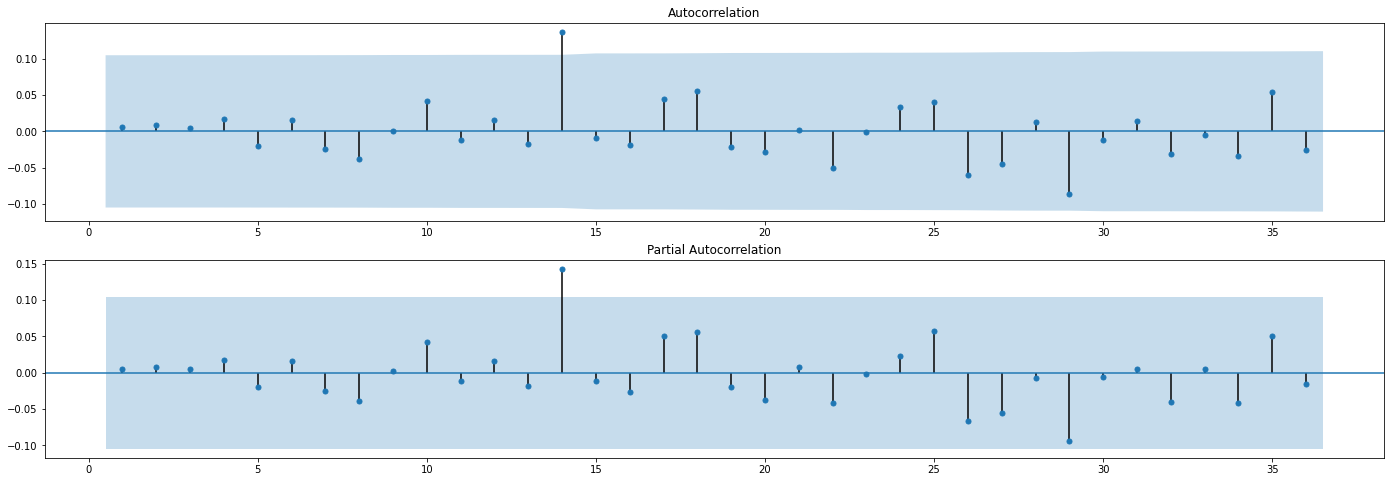

In [ ]:
check_resid(hot_arima412)

In [ ]:
rmse = sqrt(mean_squared_error(hotel_rm['profit'][8:350], hot_arima412_pred[:342]))
print('Test RMSE: {:,.3f}'.format(rmse))

Test RMSE: 2.615


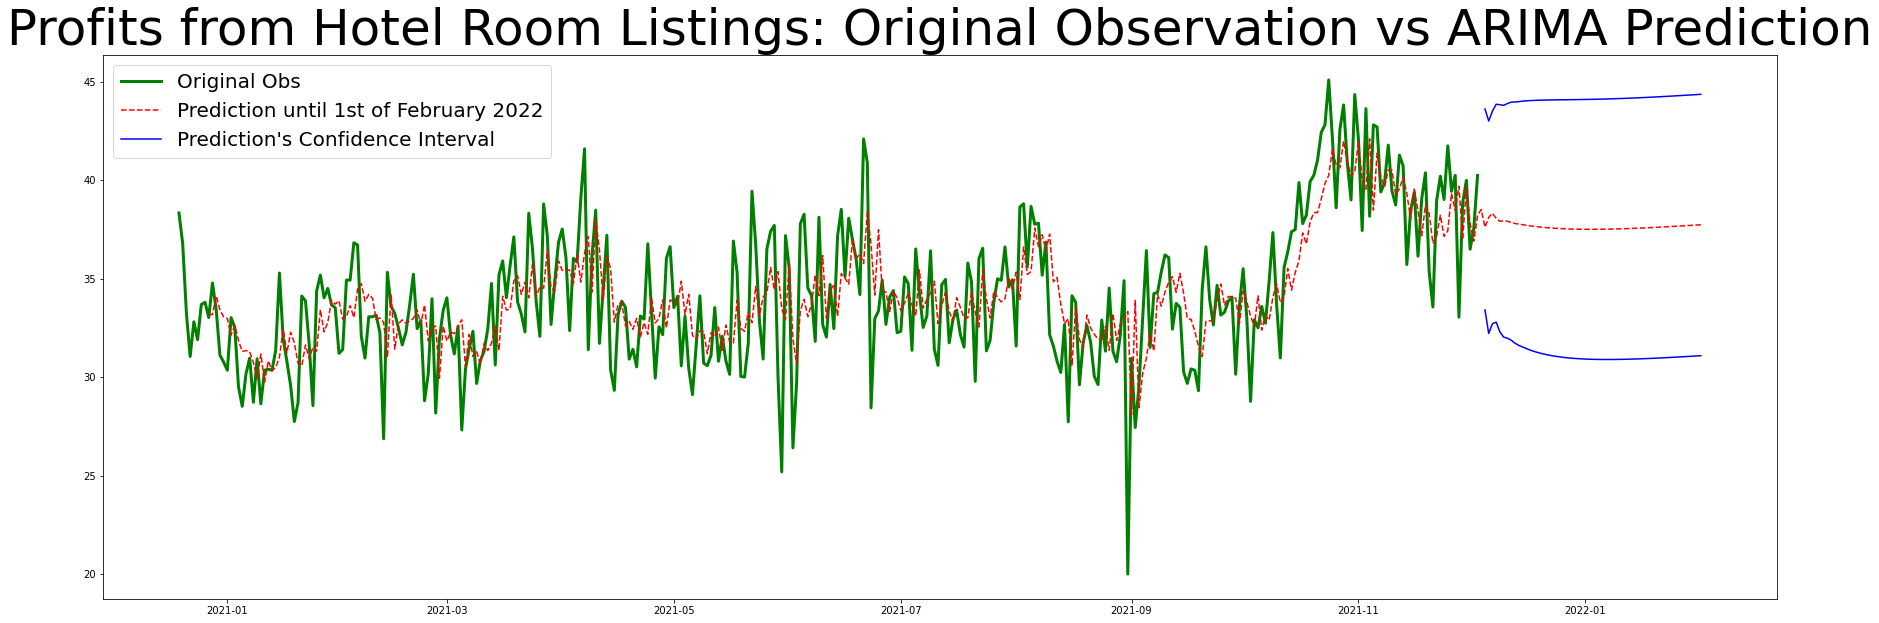

In [ ]:
show_plot(hotel_rm, hot_arima412_pred, hot_arima412_conf_int, "Profits from Hotel Room Listings")

## **Prescriptive Analytics**

In [ ]:
# Get the predicted Feb 1, 2022 profit per listing

apartProfit = apart_arima211_pred[-1]
privProfit =  priv_arima512_pred[-1]
sharedProfit = shrd_arima211_pred[-1]
hotelProfit = hot_arima412_pred[-1]

print('Predicted Profit per Room Type in February 1, 2022: \n')
print('Apartment/Entire Home Listing: ${0:.2f}'.format(apartProfit))
print('Private Room Listing: ${0:.2f}'.format(privProfit))
print('Shared Room Listing: ${0:.2f}'.format(sharedProfit))
print('Hotel Room Listing: ${0:.2f}'.format(hotelProfit))

Predicted Profit per Room Type in February 1, 2022: 

Apartment/Entire Home Listing: $55.76
Private Room Listing: $34.11
Shared Room Listing: $6.69
Hotel Room Listing: $37.75


Supposed that there is an AirBNB outbound process that offer users promo and good deals for a lodging place in Hawaii, Hawaii. As part of the AirBNB team, we try to find the maximum profit from an outbound process per customer service representative given the following constraints:

Limited outgoing call per room type listings they should process during their 8 hour shift:

For listings that offers Apartment/Entire Home for $55.76 : 20 mins

For listings that offers Private Room for $34.11 : 18 mins

For listings that offers Shared Room for $6.69 : 13 mins

For listings that offers Hotel Room for $37.75 : 15 mins

Given that they should process a minimum of 1 listing per room type.


In [ ]:
!pip install pulp

     |████████████████████████████████| 14.2 MB 14.2 MB/s 


In [ ]:
from pulp import *


#Elementary features:

lp = LpProblem("Outbound Profit", LpMaximize)

#Define variables
x1 = LpVariable(name="Apartment", lowBound=1, cat="Integer")
x2 = LpVariable(name="Private Room", lowBound=1, cat="Integer")
x3 = LpVariable(name="Shared Room", lowBound=1, cat="Integer")
x4 = LpVariable(name="Hotel Room", lowBound=1, cat="Integer")

#Add the objective function
lp += (apartProfit * x1 )+ (privProfit * x2) + (sharedProfit * x3) + (hotelProfit * x4)
#print(lp.objective)

# Add the constraints
lp += (20 * x1 + 18 * x2  + 13 * x3 + 15 * x4 <= 480, "shift time")
#print(lp.constraints)

# Solve the LP
status = lp.solve(PULP_CBC_CMD(msg=0))
#print("Status:", status) #1:optimal, 2:not solved, 3:infeasible, 4:unbounded, 5:undef
print('Optimal Solution\n')
#Print solution
for var in lp.variables():
    print("Outbound process for:", var, "should be", int(value(var)))
print("\nPossible Max Profit from a single CSR is ${0:.2f} for an outbound process of listings in Hawaii, Hawaii".format(value(lp.objective)))

Optimal Solution

Outbound process for: Apartment should be 20
Outbound process for: Hotel_Room should be 3
Outbound process for: Private_Room should be 1
Outbound process for: Shared_Room should be 1

Possible Max Profit from a single CSR is $1269.24 for an outbound process of listings in Hawaii, Hawaii
